## Importing the Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
#import librosa
from scipy import signal 
from scipy.io import wavfile
import IPython.display as ipd
from scipy.signal import lfilter, butter
from scipy.signal import lfilter, peak_widths, peak_prominences
import peakutils

## Loading the Exports from RawPower

In [2]:
# We will use these two lists for the plots 
muscles= ['Brachioradialis  Sx', 
          'Brachioradialis  Dx',
          'Extensor Carpi Radialis Sx',
          'Extensor Carpi Radialis  Dx',
          'Triceps brachii Long Head Dx', 
          'Deltoid  Lateral  Dx',
          'Abductor digiti minimi (hand) Sx',
          'Abductor digiti minimi (hand) Dx']
gesture = ['Arpeggio',
           'Strumming',
           'Bending', 
           'PullOffHammerOn',
           'Tapping',
            'StrongPick',
            'DoublePick']

#RMS path
arpeggio_path_rms =  "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\1 Arpeggio\Arpeggio_rms_exp.xlsx"
strumming_path_rms = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\2 Strumming\Strumming_rms_exp.xlsx"
bending_path = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\3 Bending\Bending_rms_exp.xlsx"
pullOffHammerOn_path_rms = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\4 PullOffHammerOn\PullOffHammerOn_rms_exp.xlsx"
tapping_path_rms = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\5 Tapping\\tapping_rms_exp.xlsx"
strongPick_path_rms = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\6 StrongPick\\strongPick_rms_exp.xlsx"
doublePick_path_rms = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\7 DoublePick\\doublePick_rms_exp.xlsx"

#RAW path
arpeggio_path_raw =  "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\1 Arpeggio\Arpeggio_exp.xlsx"
strumming_path_raw = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\2 Strumming\Strumming_exp.xlsx"
bending_path_raw = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\3 Bending\Bending_exp.xlsx"
pullOffHammerOn_path_raw = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\4 PullOffHammerOn\PullOffHammerOn_exp.xlsx"
tapping_path_raw = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\5 Tapping\\tapping_exp.xlsx"
strongPick_path_raw = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\6 StrongPick\\strongPick_exp.xlsx"
doublePick_path_raw = "C:\\Users\david\OneDrive - Politecnico di Milano\Documenti\GItDesktop\MAE_Thesis\\firstPrototype\secondAcquisition\\7 DoublePick\\doublePick_exp.xlsx"

sheet= "Sheet1" #exel sheet name

### Importing the raw pawer RMS recordings

In [9]:


#LOADING THE RECORDIND INTO PANDAS DATAFRAME
gesture_df_list_rms = []

dataFrame_arpeggio_rms = pd.read_excel(io=arpeggio_path_rms, sheet_name=sheet)
gesture_df_list_rms.append(dataFrame_arpeggio_rms)
dataFrame_arpeggio_rms.iloc[:,1:].to_csv('csv_pd_dataframe/df_arpeggio_rms', index= False) # I save the dataframe to a cvs file excluding the first 'TIME STAMP' column

dataFrame_strumming_rms = pd.read_excel(io=strumming_path_rms, sheet_name=sheet)
gesture_df_list_rms.append(dataFrame_strumming_rms)
dataFrame_strumming_rms.iloc[:,1:].to_csv('csv_pd_dataframe/df_strumming_rms', index= False)

dataFrame_bending_rms = pd.read_excel(io=bending_path, sheet_name=sheet)
gesture_df_list_rms.append(dataFrame_bending_rms)
dataFrame_bending_rms.iloc[:,1:].to_csv('csv_pd_dataframe/df_bending_rms', index= False)

dataFrame_pullOffHammerOn_rms= pd.read_excel(io=pullOffHammerOn_path_rms, sheet_name=sheet)
gesture_df_list_rms.append(dataFrame_pullOffHammerOn_rms)
dataFrame_pullOffHammerOn_rms.iloc[:,1:].to_csv('csv_pd_dataframe/df_pullOffHammerOn_rms', index= False)

dataFrame_tapping_rms = pd.read_excel(io=tapping_path_rms, sheet_name=sheet)
gesture_df_list_rms.append(dataFrame_tapping_rms)
dataFrame_tapping_rms.iloc[:,1:].to_csv('csv_pd_dataframe/df_tapping_rms', index= False)

dataFrame_strongPick_rms = pd.read_excel(io=strongPick_path_rms, sheet_name=sheet)
gesture_df_list_rms.append(dataFrame_strongPick_rms)
dataFrame_strongPick_rms.iloc[:,1:].to_csv('csv_pd_dataframe/df_strongPick_rms', index= False)

dataFrame_doublePick_rms = pd.read_excel(io=doublePick_path_rms, sheet_name=sheet)
gesture_df_list_rms.append(dataFrame_doublePick_rms)
dataFrame_doublePick_rms.iloc[:,1:].to_csv('csv_pd_dataframe/df_doublePick_rms', index= False)


In [ ]:
gesture_df_list_raw = [] # list of pd.df, one for each gesture 

dataFrame_arpeggio_raw = pd.read_excel(io=arpeggio_path_raw, sheet_name=sheet)
gesture_df_list_raw.append(dataFrame_arpeggio_raw)

dataFrame_strumming_raw = pd.read_excel(io=strumming_path_raw, sheet_name=sheet)
gesture_df_list_raw.append(dataFrame_strumming_raw)

dataFrame_bending_raw = pd.read_excel(io=bending_path_raw, sheet_name=sheet)
gesture_df_list_raw.append(dataFrame_bending_raw)

dataFrame_pullOffHammerOn_raw= pd.read_excel(io=pullOffHammerOn_path_raw, sheet_name=sheet)
gesture_df_list_raw.append(dataFrame_pullOffHammerOn_raw)

dataFrame_tapping_raw = pd.read_excel(io=tapping_path_raw, sheet_name=sheet)
gesture_df_list_raw.append(dataFrame_tapping_raw)

dataFrame_strongPick_raw = pd.read_excel(io=strongPick_path_raw, sheet_name=sheet)
gesture_df_list_raw.append(dataFrame_strongPick_raw)

dataFrame_doublePick_raw = pd.read_excel(io=doublePick_path_raw, sheet_name=sheet)
gesture_df_list_raw.append(dataFrame_doublePick_raw)


### Covertin from pandas dataframe to numpy array

In [ ]:
"""  """

npdf_arpeggio_rms = np.asarray(dataFrame_arpeggio_rms) 
npdf_strumming_rms = np.asarray(dataFrame_strumming_rms)
npdf_bending_rms = np.asarray(dataFrame_bending_rms) 
npdf_pullOffHammerOn_rms = np.asarray(dataFrame_pullOffHammerOn_rms) 
npdf_tapping_rms = np.asarray(dataFrame_tapping_rms) 
npdf_strongPick_rms = np.asarray(dataFrame_strongPick_rms) 
npdf_doublePick_rms = np.asarray(dataFrame_doublePick_rms) 


npdf_arpeggio_raw = np.asarray(dataFrame_arpeggio_raw) 
npdf_strumming_raw = np.asarray(dataFrame_strumming_raw)
npdf_bending_raw = np.asarray(dataFrame_bending_raw) 
npdf_pullOffHammerOn_raw = np.asarray(dataFrame_pullOffHammerOn_raw) 
npdf_tapping_raw = np.asarray(dataFrame_tapping_raw) 
npdf_strongPick_raw = np.asarray(dataFrame_strongPick_raw) 
npdf_doublePick_raw = np.asarray(dataFrame_doublePick_raw)





### Creating a list of df for each muscle

In [ ]:
#
muscles_df_list_raw = []
muscles_df_list_rms = []

df_Brachioradialis_Sx = pd.DataFrame()
muscles_df_list_raw.append(df_Brachioradialis_Sx)
muscles_df_list_rms.append(df_Brachioradialis_Sx)

df_Brachioradialis_Dx = pd.DataFrame()
muscles_df_list_raw.append(df_Brachioradialis_Dx)
muscles_df_list_rms.append(df_Brachioradialis_Dx)


df_Extensor_Carpi_Radialis_Sx= pd.DataFrame()
muscles_df_list_raw.append(df_Extensor_Carpi_Radialis_Sx)
muscles_df_list_rms.append(df_Extensor_Carpi_Radialis_Sx)

df_Extensor_Carpi_Radialis_Dx= pd.DataFrame()
muscles_df_list_raw.append(df_Extensor_Carpi_Radialis_Dx)
muscles_df_list_rms.append(df_Extensor_Carpi_Radialis_Dx)

df_Triceps_Dx= pd.DataFrame()
muscles_df_list_raw.append(df_Triceps_Dx)
muscles_df_list_rms.append(df_Triceps_Dx)


df_Deltoid_Lateral_Dx= pd.DataFrame()
muscles_df_list_raw.append(df_Deltoid_Lateral_Dx)
muscles_df_list_rms.append(df_Deltoid_Lateral_Dx)

df_hand_Sx= pd.DataFrame()
muscles_df_list_raw.append(df_hand_Sx)
muscles_df_list_rms.append(df_hand_Sx)

df_hand_Dx= pd.DataFrame()
muscles_df_list_raw.append(df_hand_Dx)
muscles_df_list_rms.append(df_hand_Dx)

#print(muscles_df_list)
#print(gesture_df_list_raw)

#print(dataFrame_arpeggio)

### Printing each muscle



Muscle name:  Brachioradialis  Sx the mean ZC:  2 the mean RMS:  5253
Muscle name:  Brachioradialis  Dx the mean ZC:  2 the mean RMS:  2471
Muscle name:  Extensor Carpi Radialis Sx the mean ZC:  2 the mean RMS:  2603
Muscle name:  Extensor Carpi Radialis  Dx the mean ZC:  2 the mean RMS:  1835
Muscle name:  Triceps brachii Long Head Dx the mean ZC:  2 the mean RMS:  5494
Muscle name:  Deltoid  Lateral  Dx the mean ZC:  2 the mean RMS:  641
Muscle name:  Abductor digiti minimi (hand) Sx the mean ZC:  2 the mean RMS:  3940
Muscle name:  Abductor digiti minimi (hand) Dx the mean ZC:  2 the mean RMS:  2839


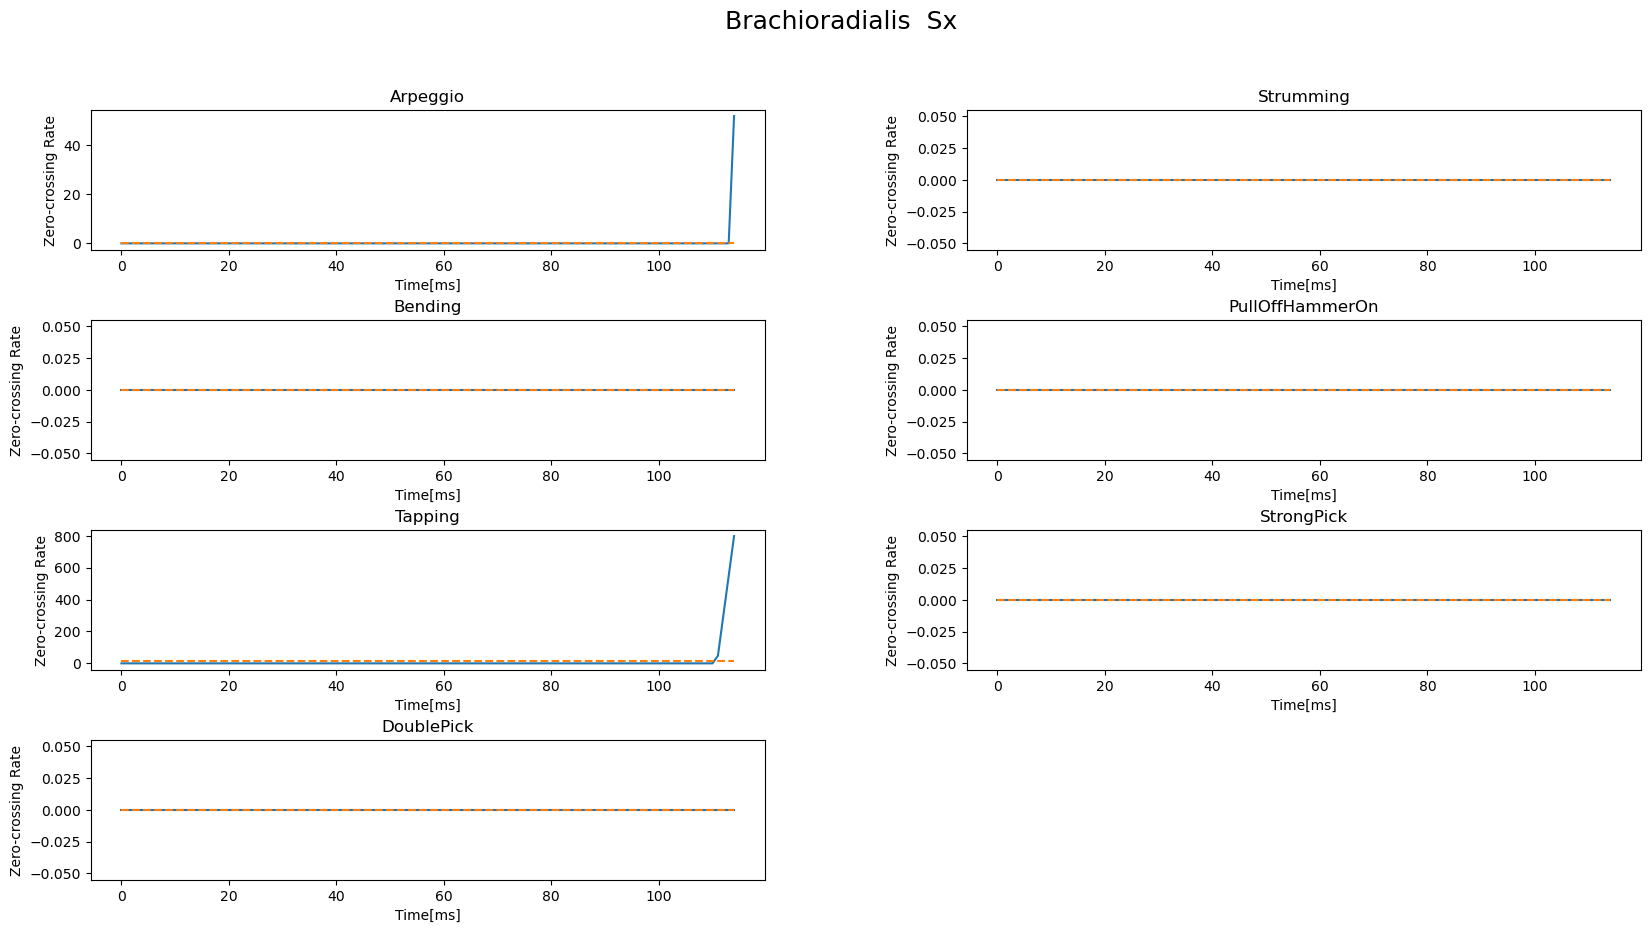

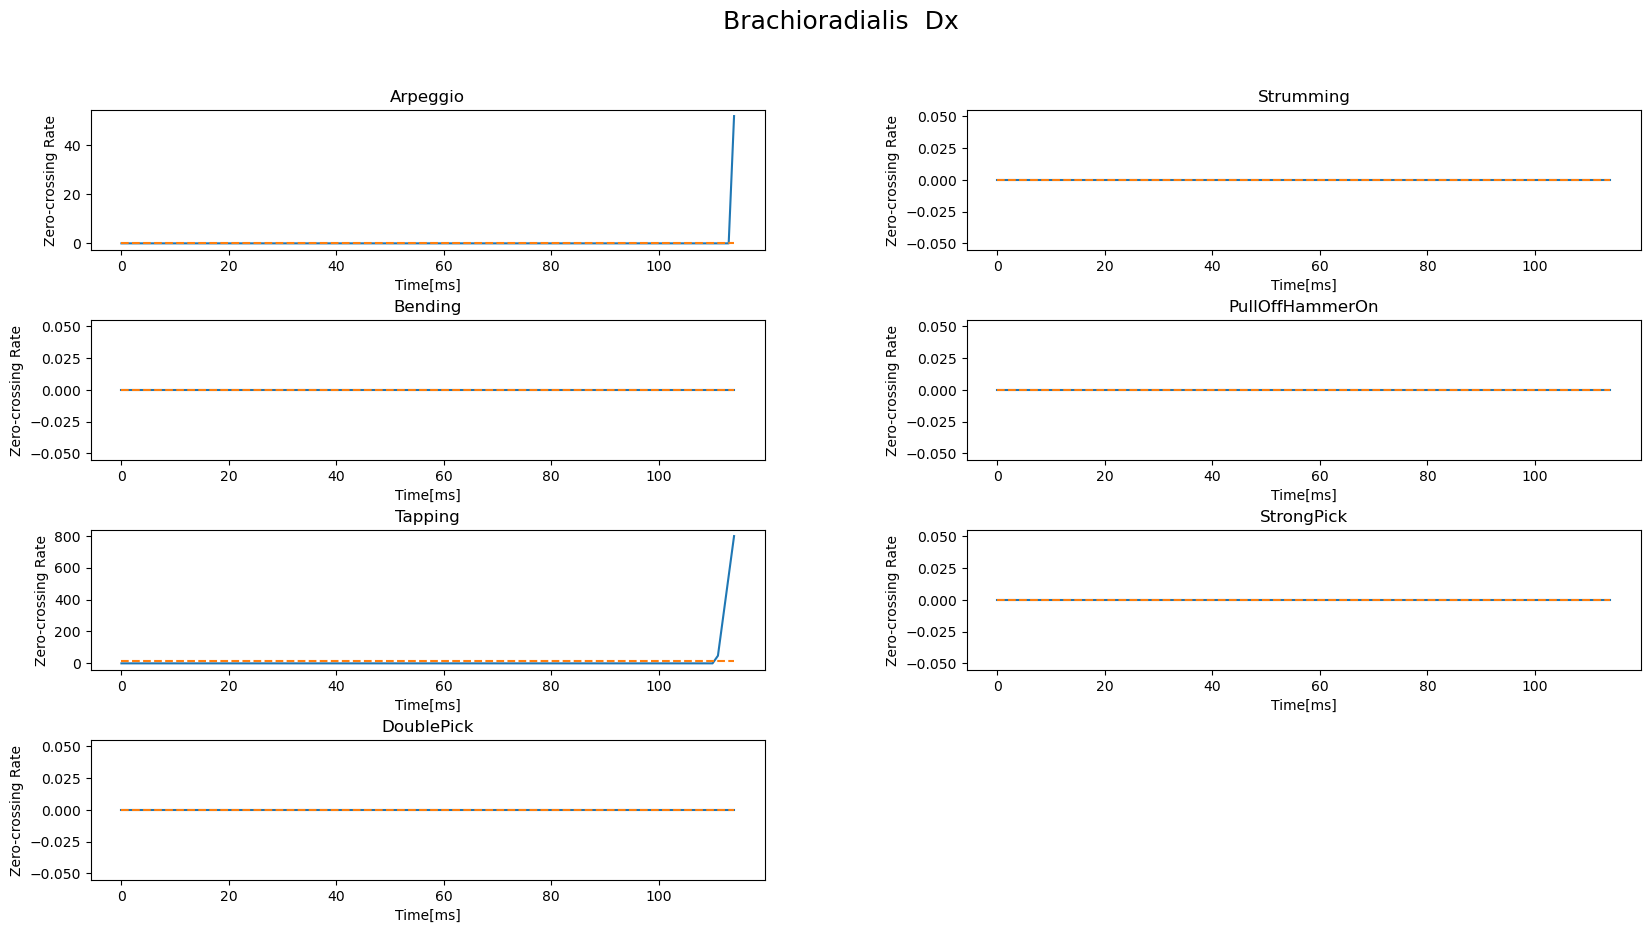

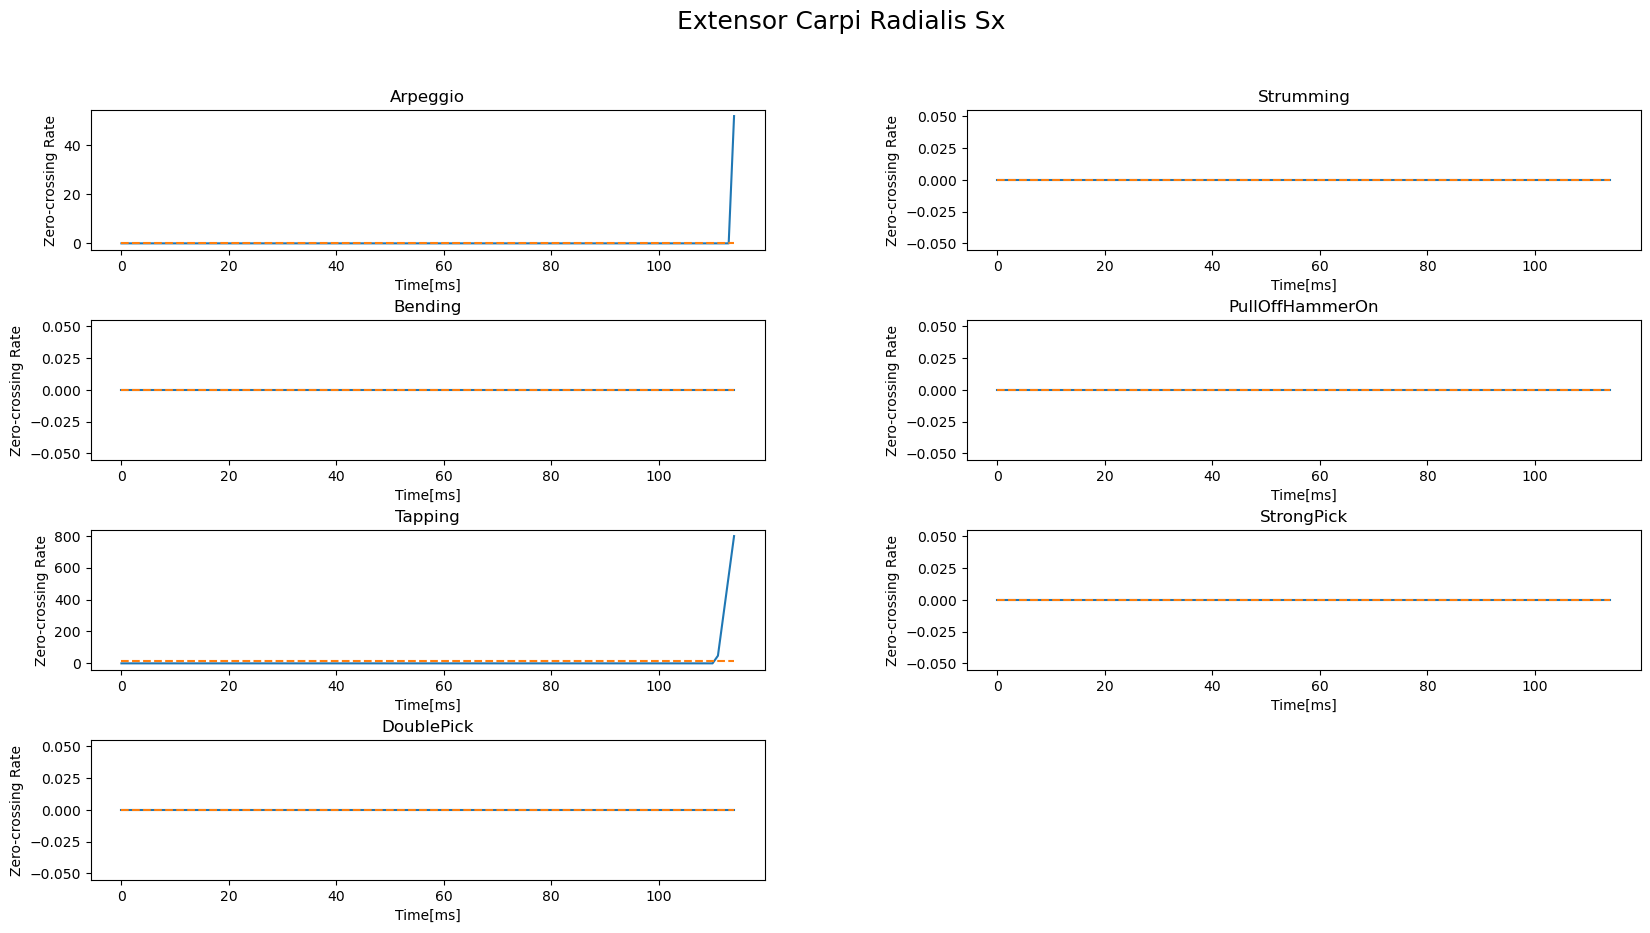

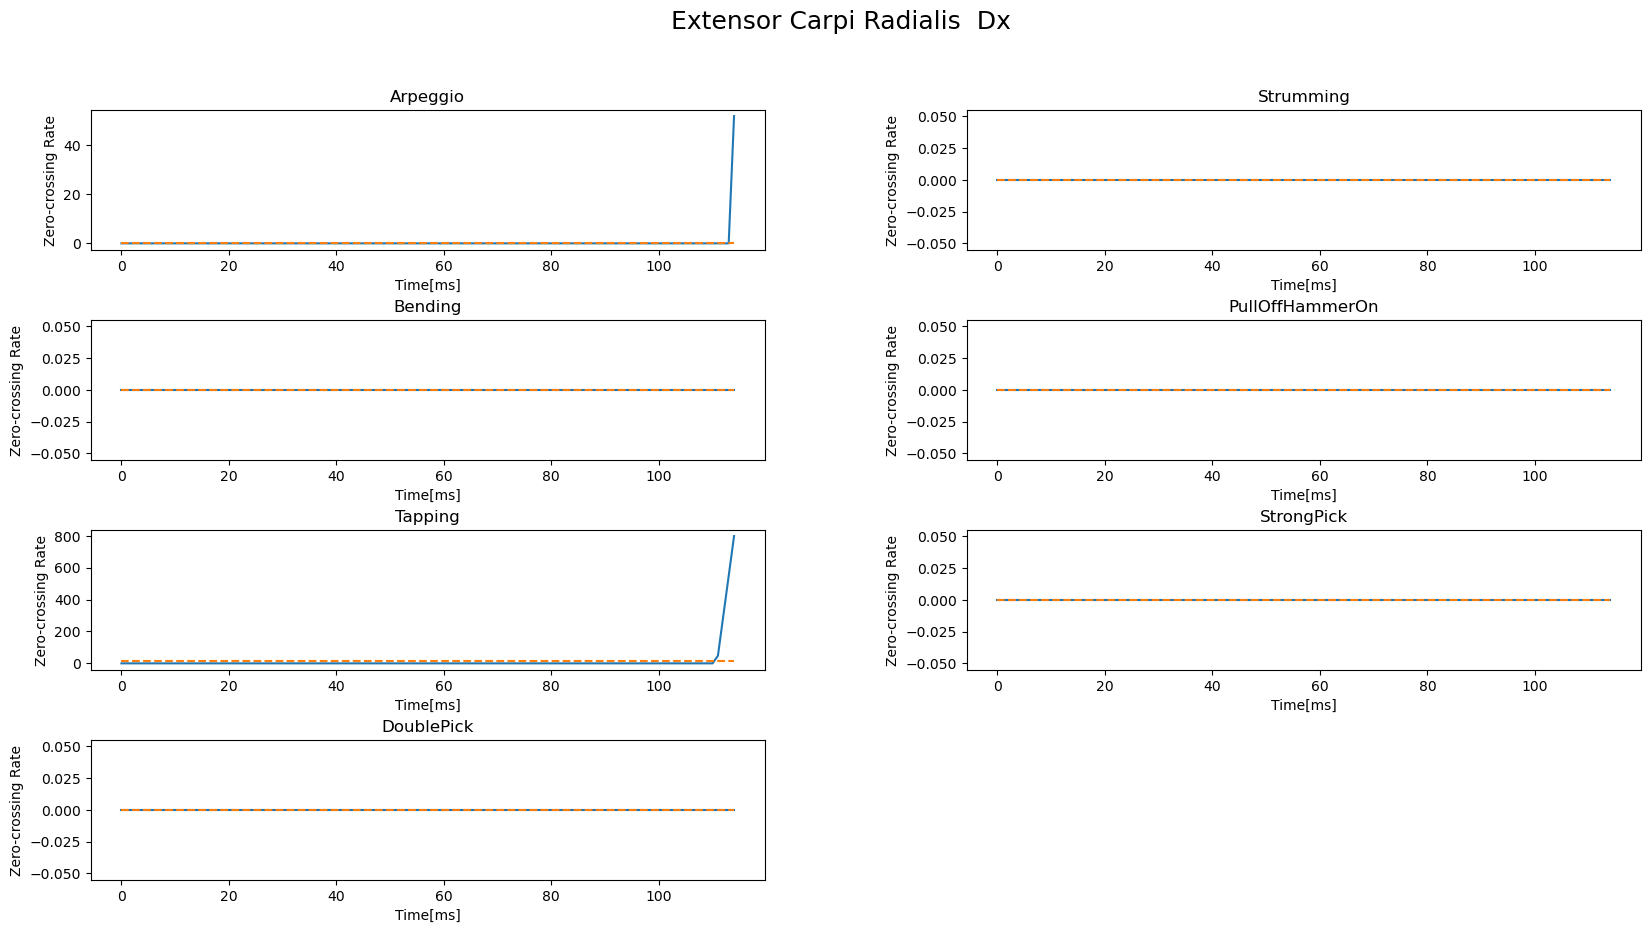

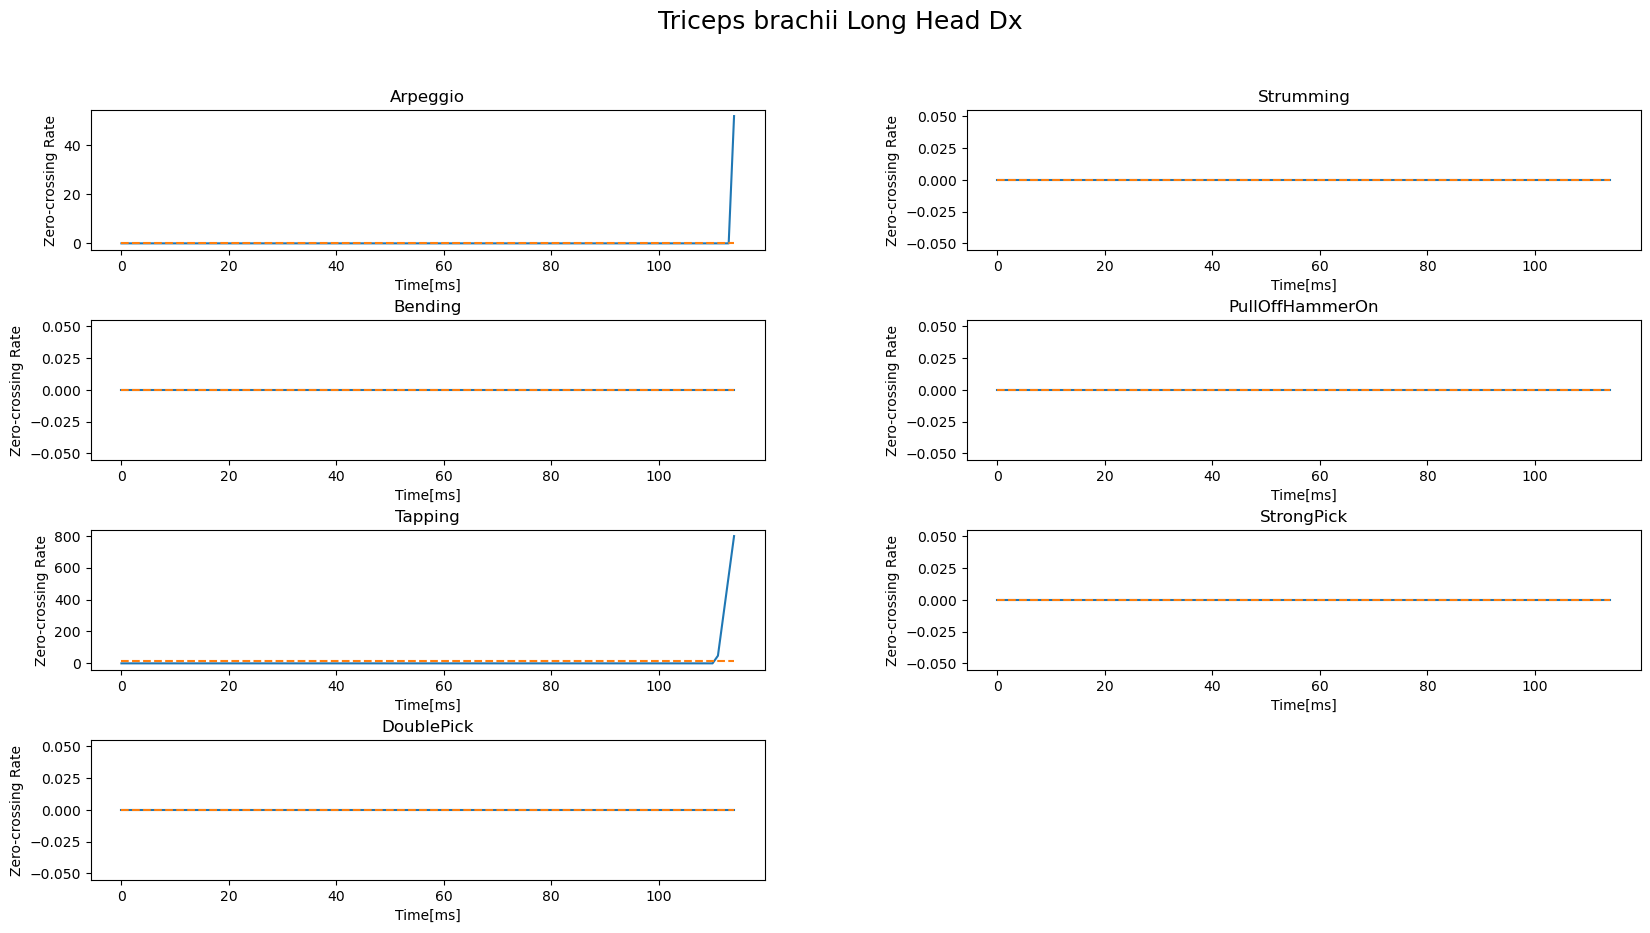

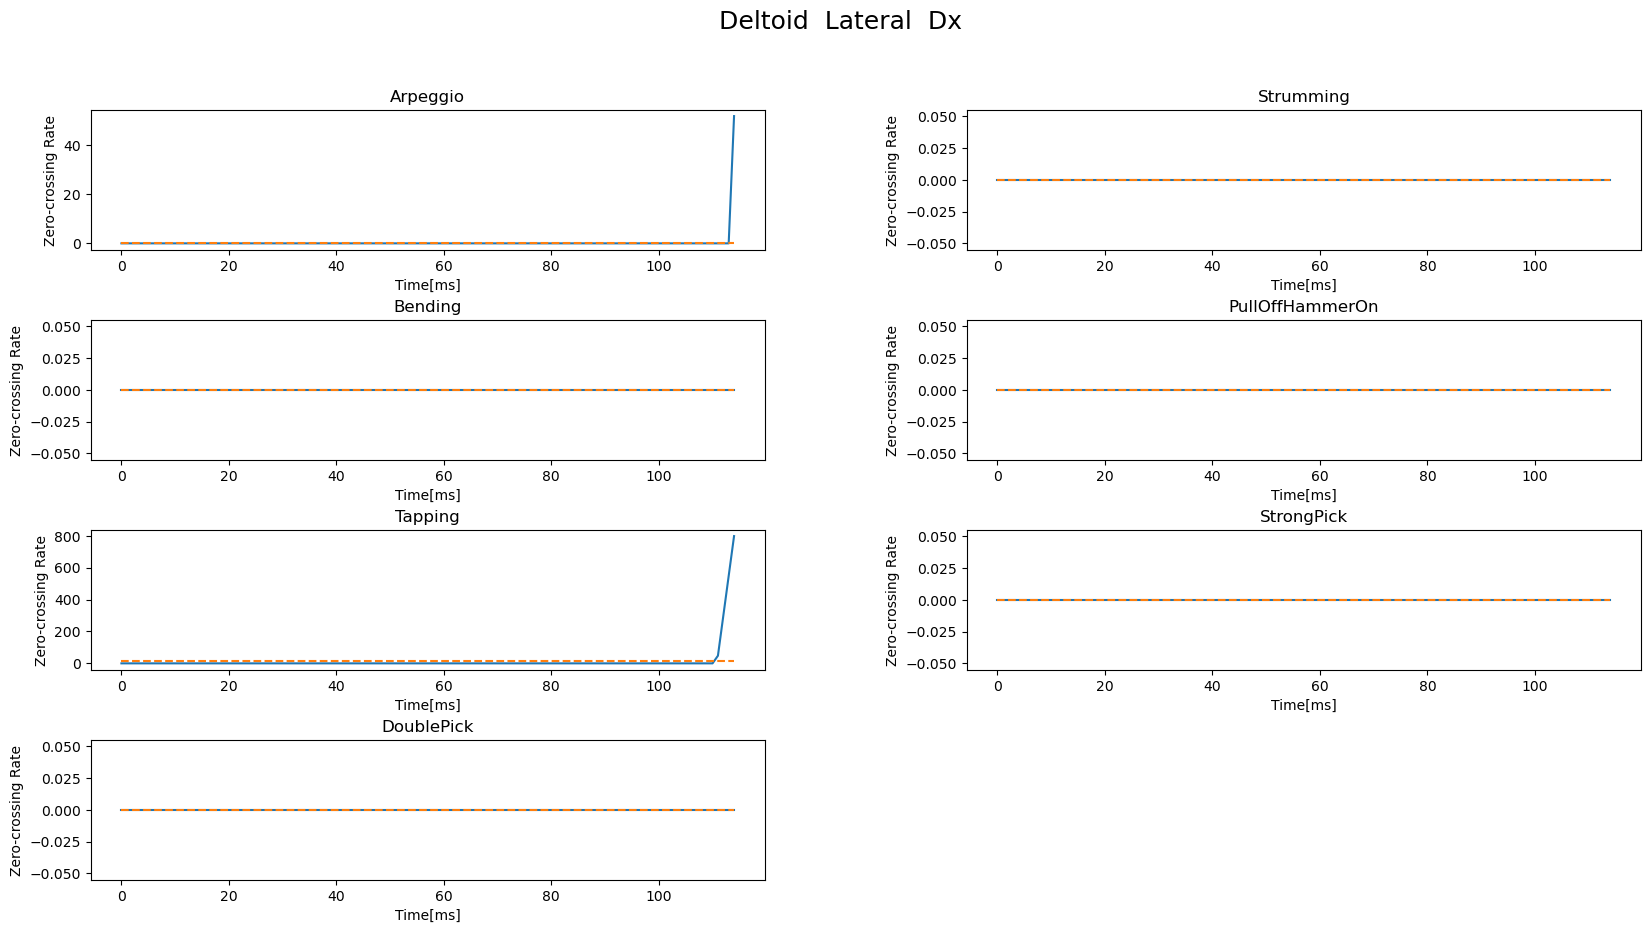

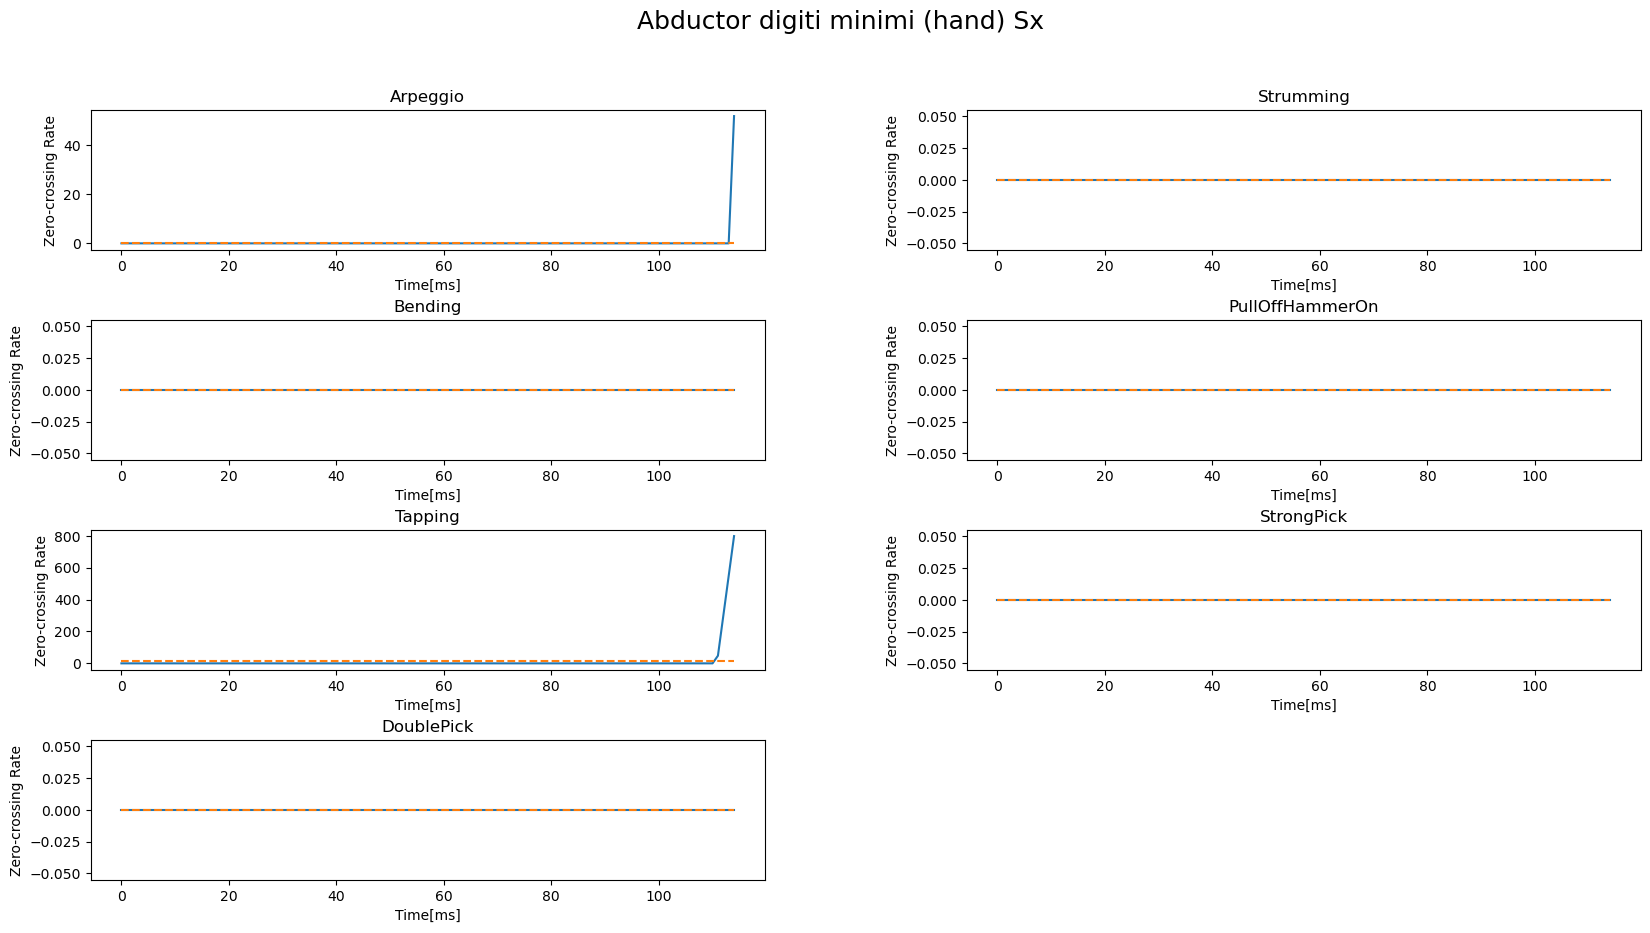

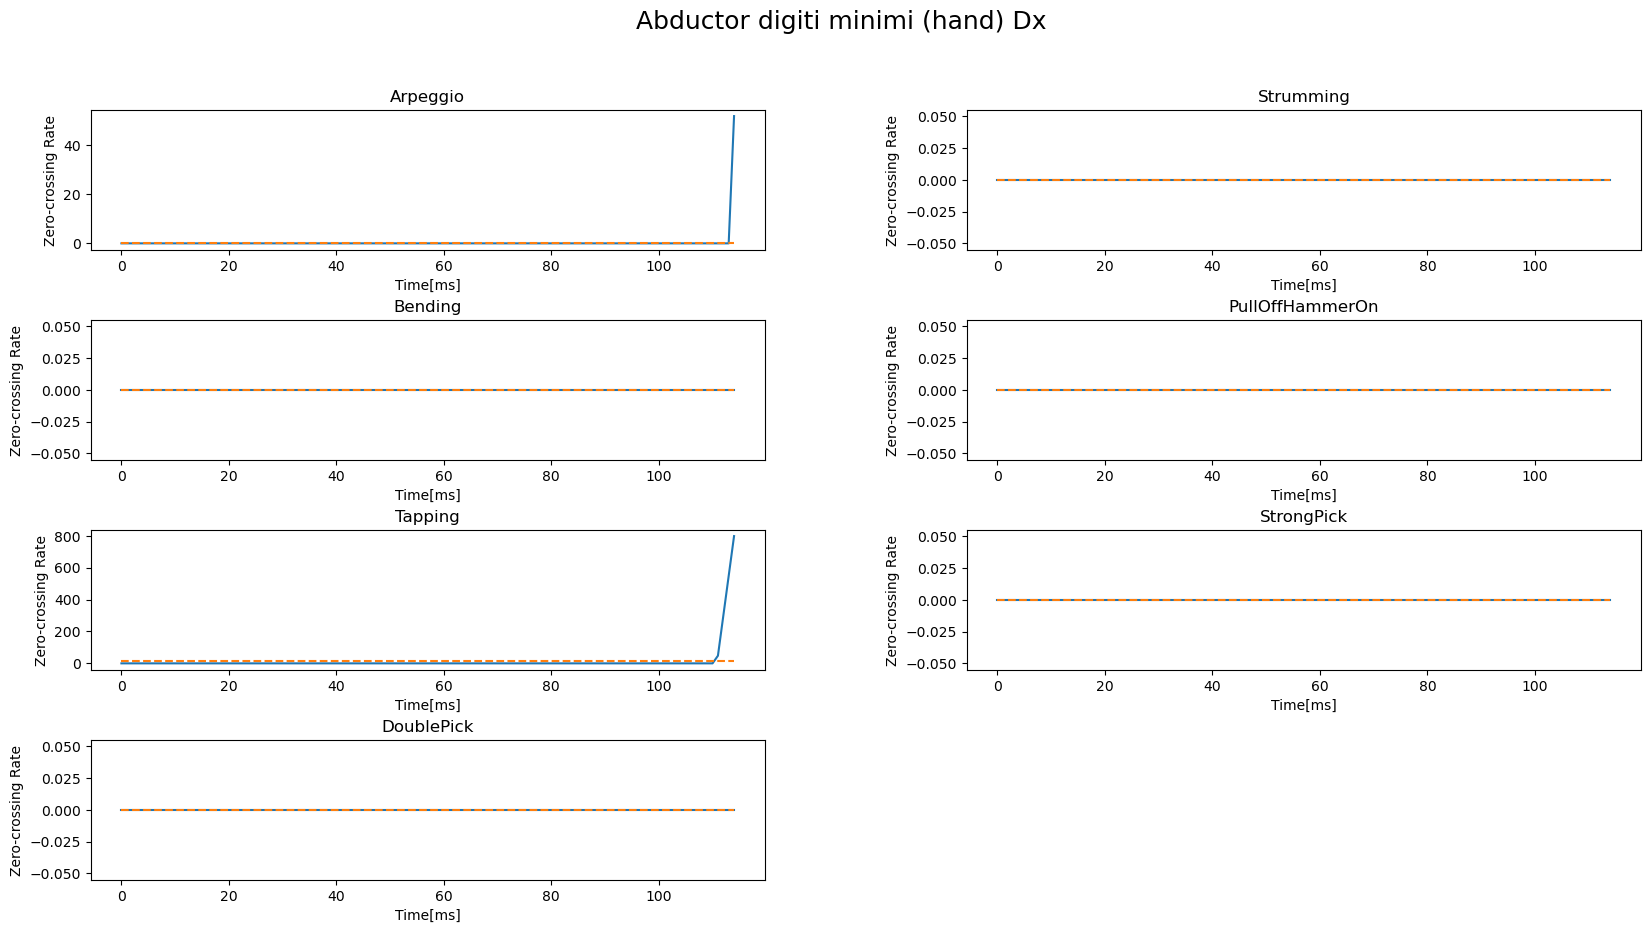

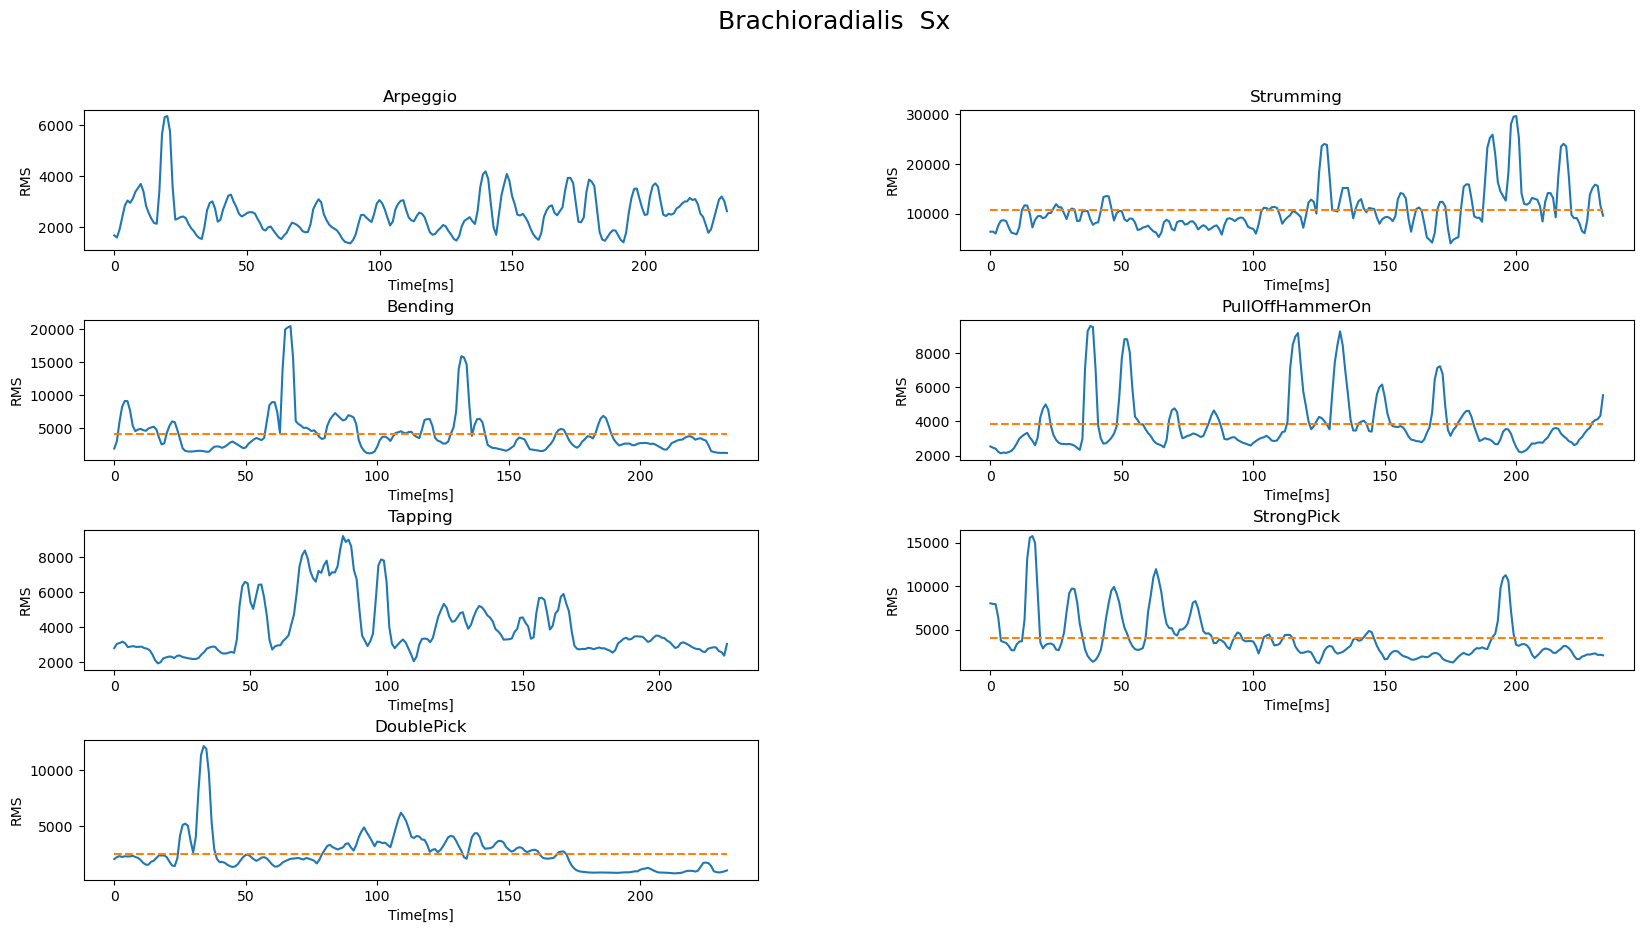

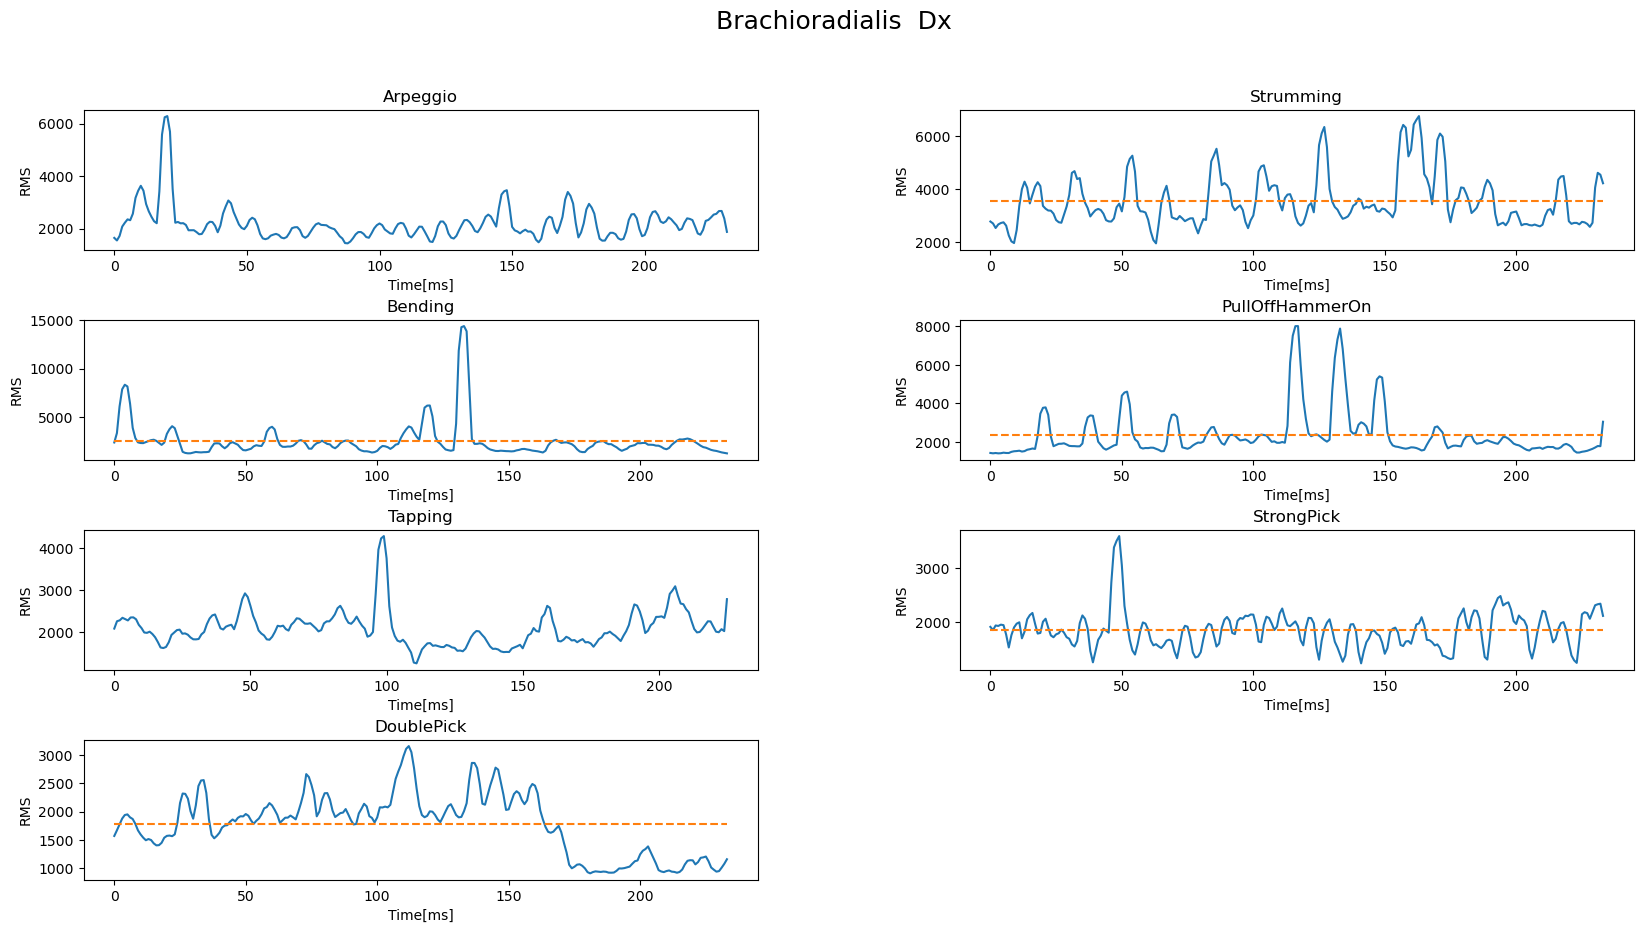

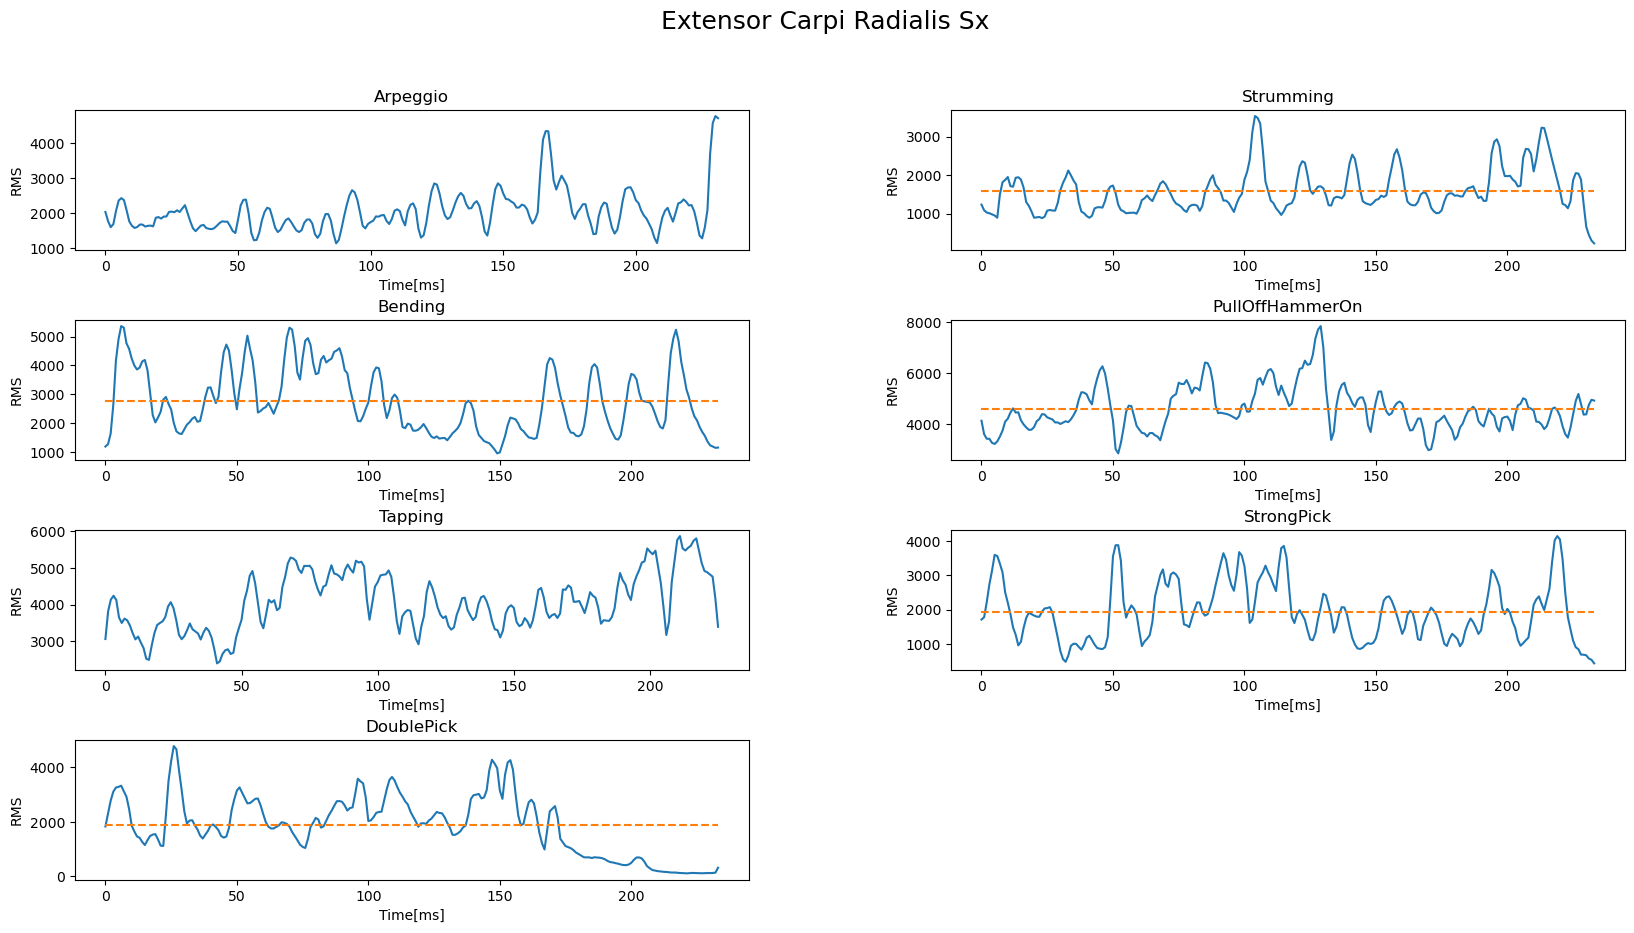

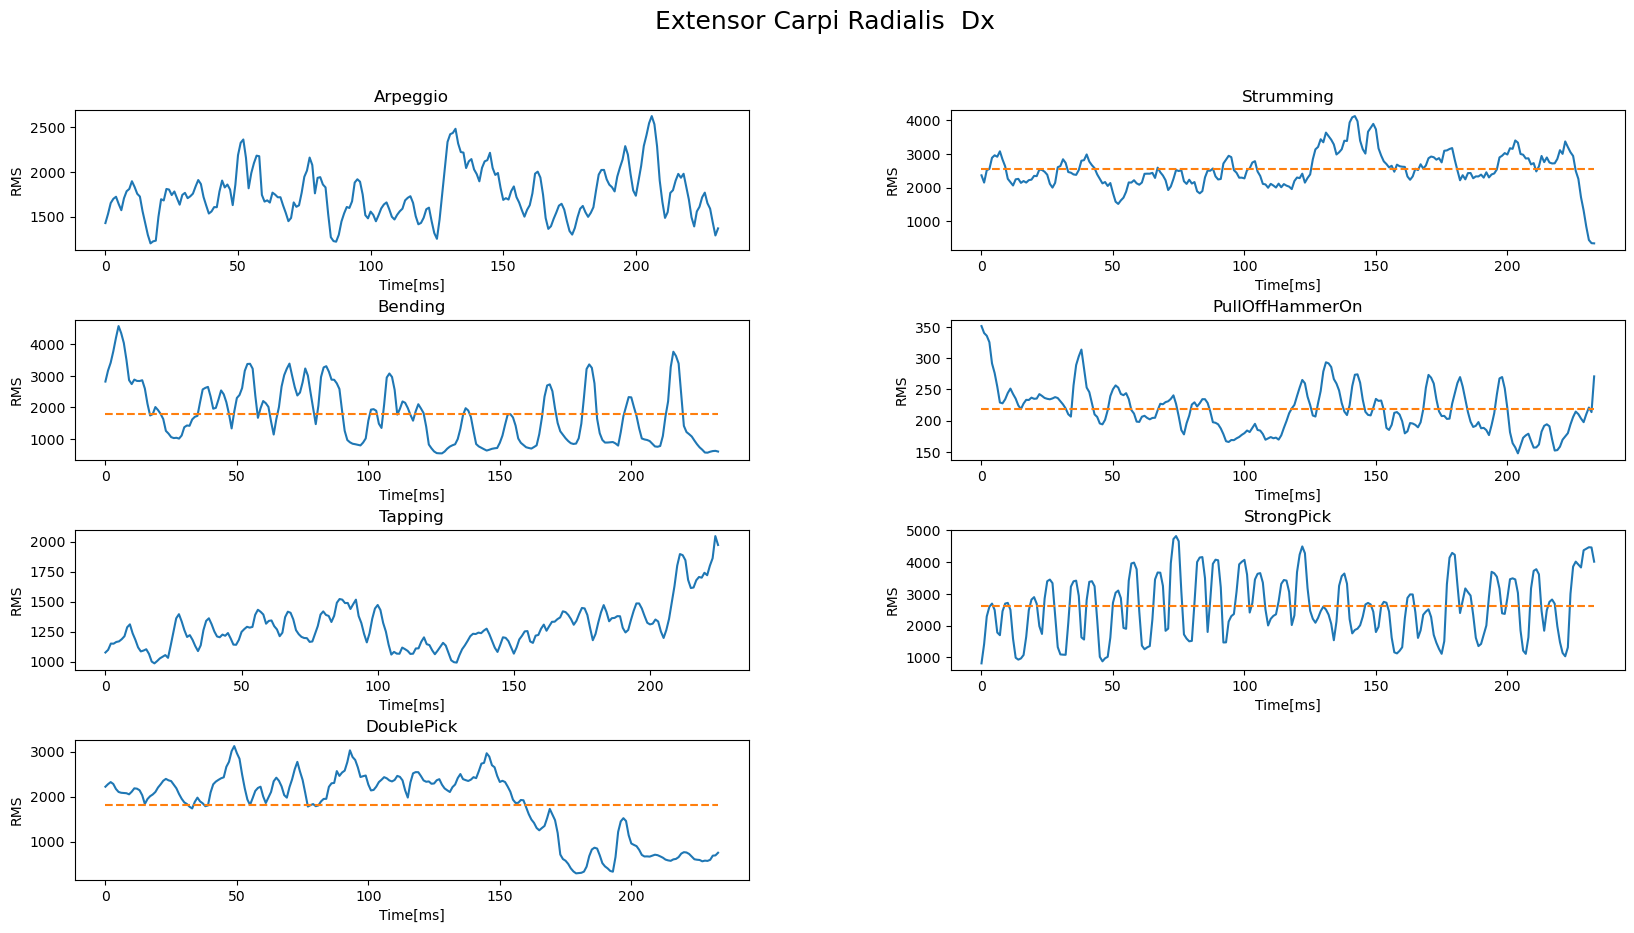

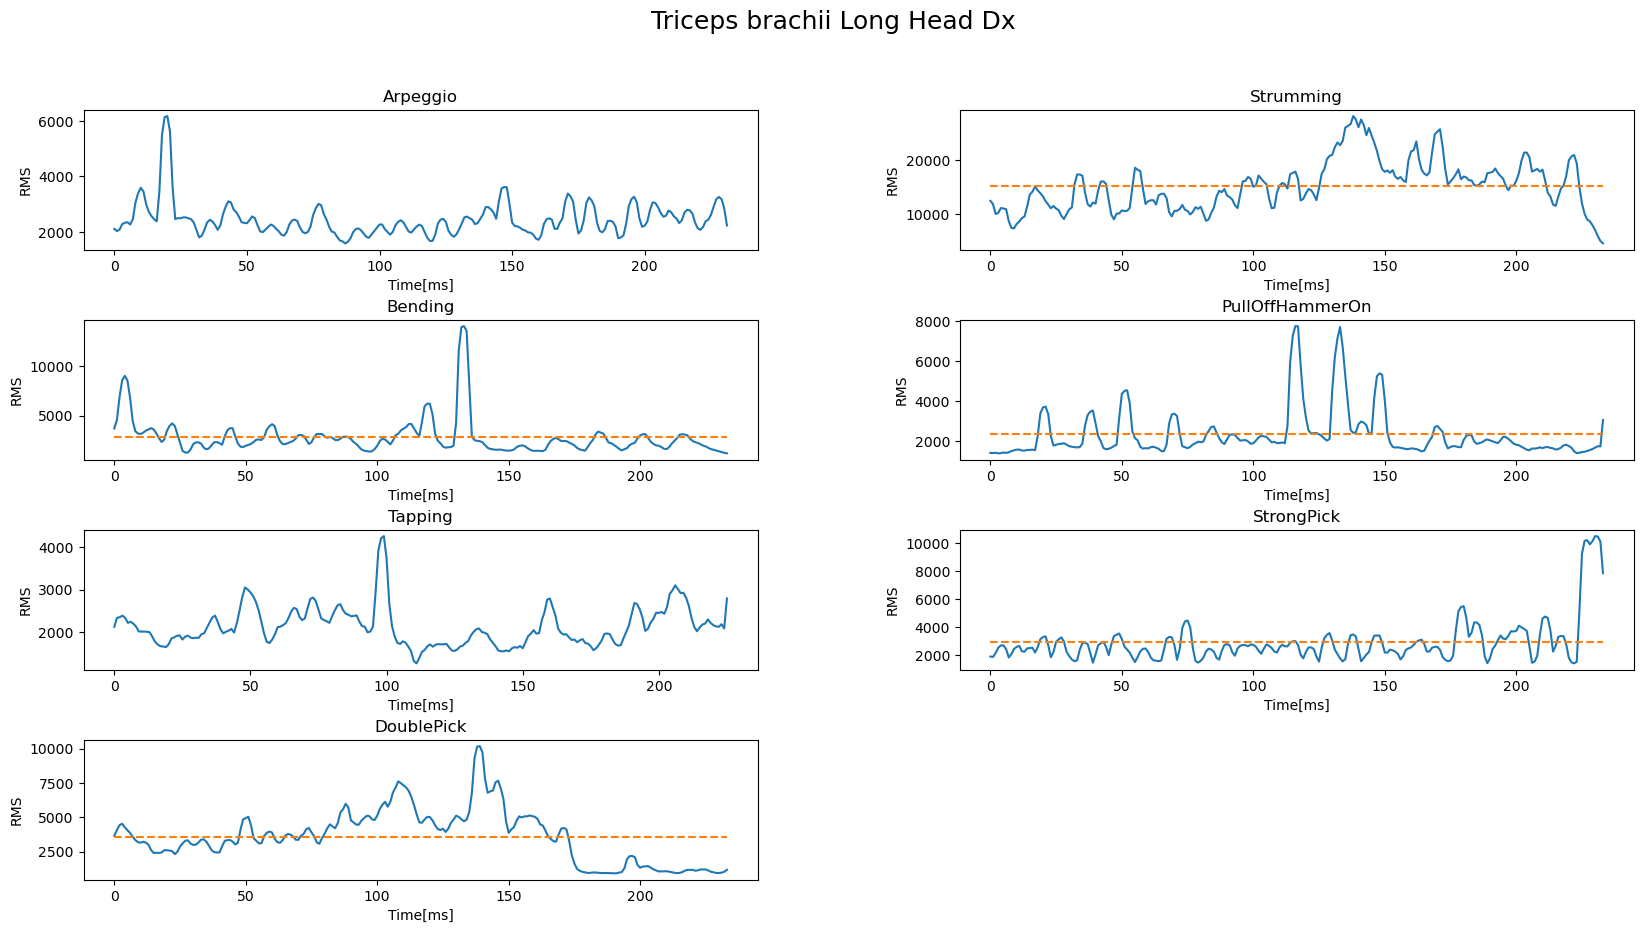

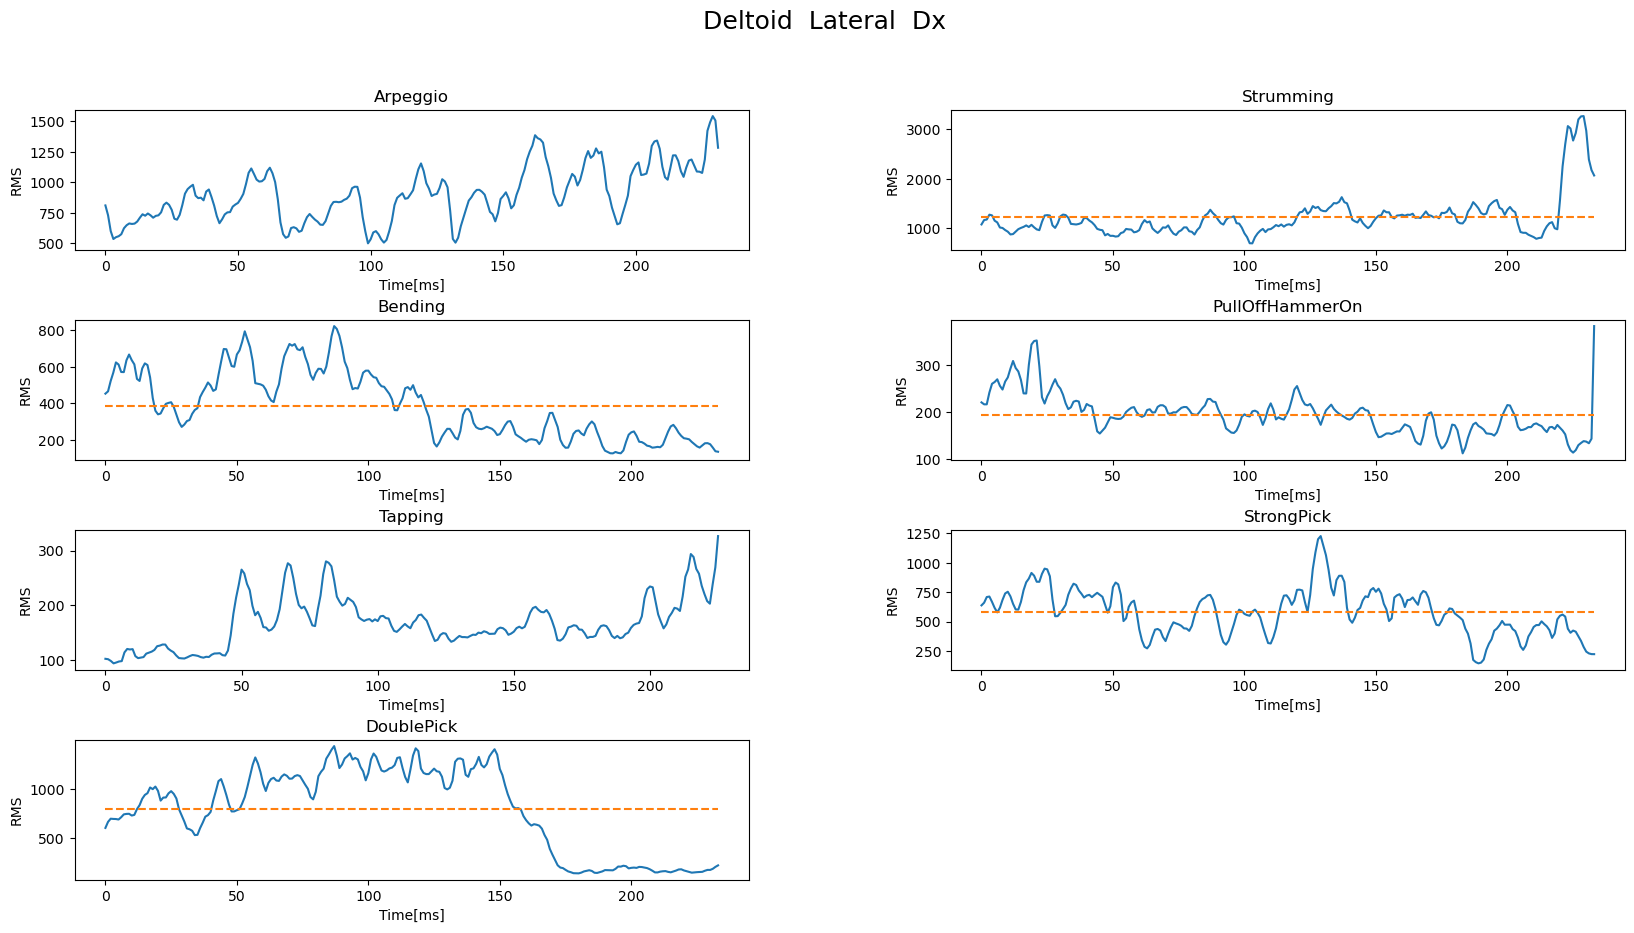

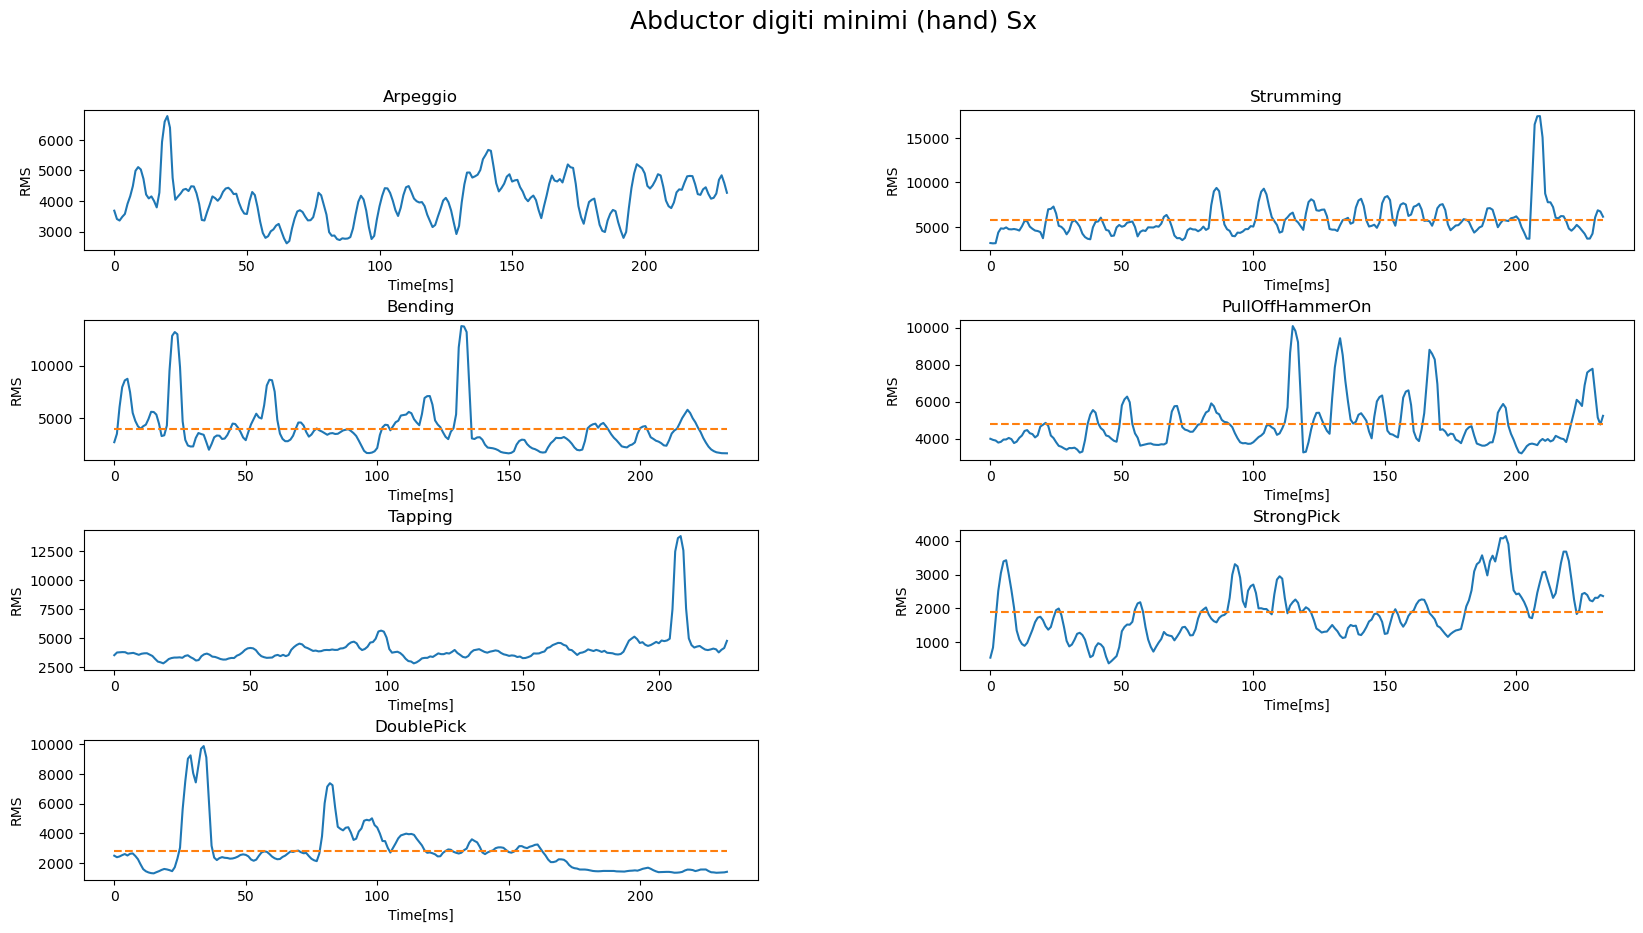

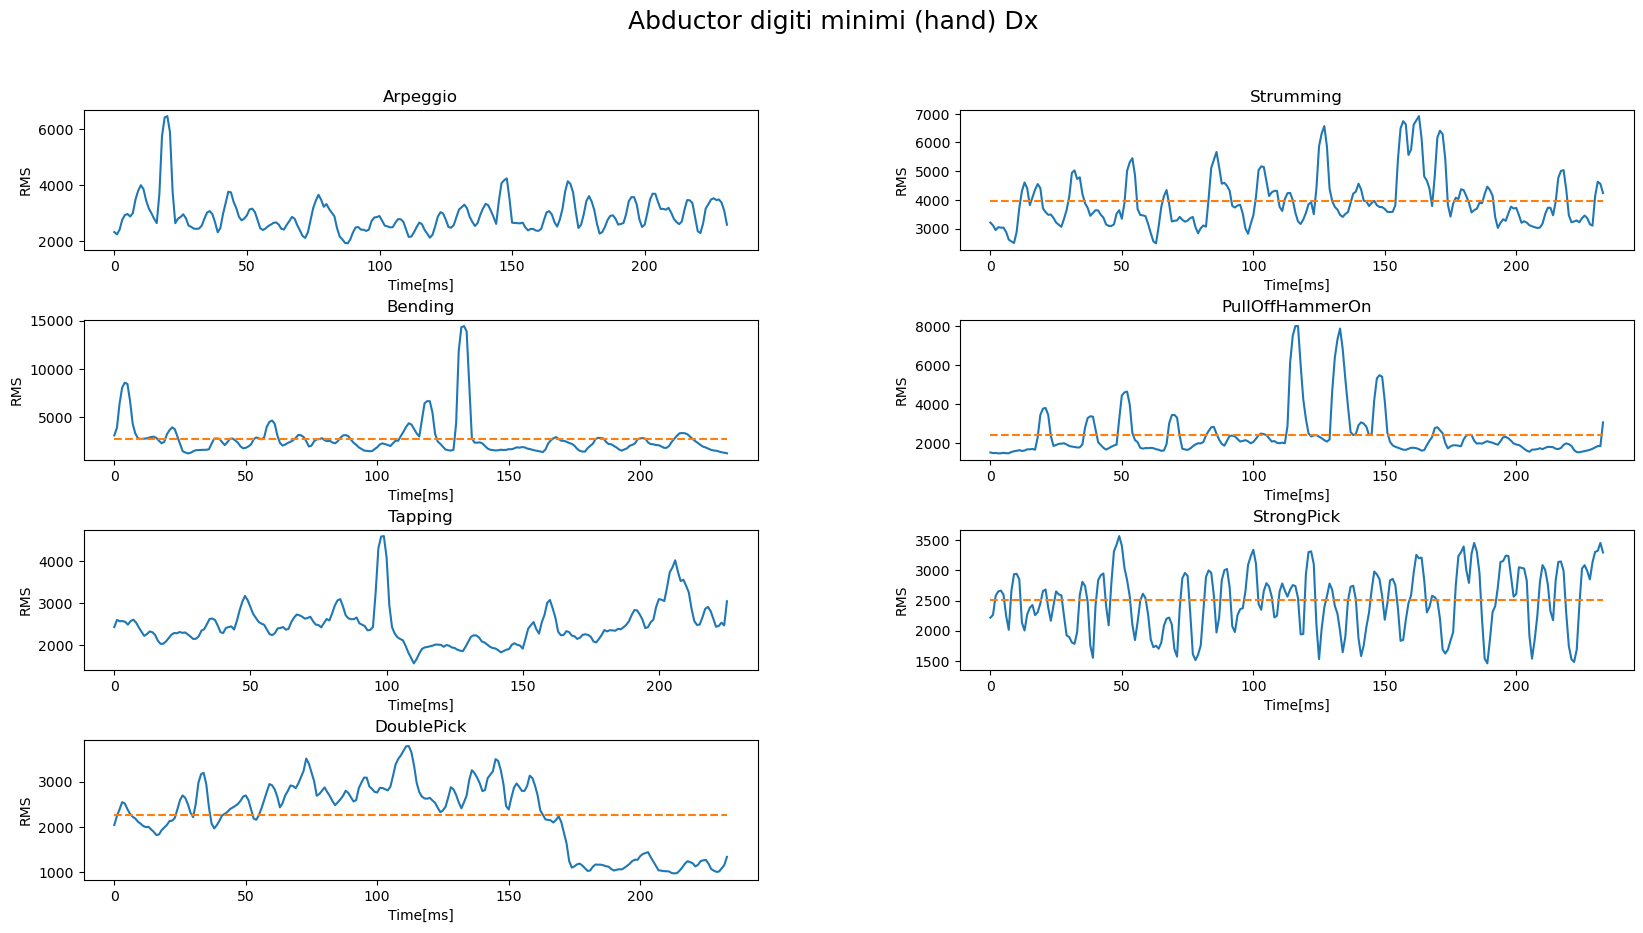

In [33]:
"""
COSE DA FARE : scarto i primi 10k sample e gli ultime 5k 
ZERO CROSSING: CAPIRE DIMENSIONE DELLA FINESTRA 

"""
from scipy import signal
from numpy import lib


muscle_np_list_raw= []
muscle_np_list_rms= []
#Create the dataFrame with each muscle associated to 7 gestures
def muscle_dataFrame(mus_df_list, gest_df_list,gesture_list):
    #columns = dataFrame.columns.values[1:] # take the column of the dataframe
    for i in range(len(mus_df_list)):
        for j in range(len(gest_df_list)):
            #print(gest_df_list[j].columns.values[i+1])
            mus_df_list[i][gesture_list[j]] = gest_df_list[j][gest_df_list[j].columns.values[i+1]]

muscle_dataFrame(muscles_df_list_raw, gesture_df_list_raw, gesture)
muscle_dataFrame(muscles_df_list_rms, gesture_df_list_rms, gesture)


#numpy convertion
for i in range(len(muscles_df_list_raw)):
    muscle_np_list_raw.append(np.asarray(muscles_df_list_raw[i]))  

for i in range(len(muscles_df_list_rms)):
    muscle_np_list_raw.append(np.asarray(muscles_df_list_rms[i]))        


def ZC(vect):
    """computes the zero_crossing
    
    Args:
        vect(array_like): array on which compute the zero crossing

    Returns: 
        int: ZC value
    """
    return len(np.where(np.diff(np.sign(vect)))[0])
def RMS(vect):
    """computes the root mean square 
    
    Args:
        vect(array_like): array on which compute RMS
 
    Returns: 
        float: RMS value
    """
    return np.sqrt(np.sum(np.square(vect))/np.size(vect))
#zc_muscles= []
#print(np.shape(muscle_np_list_raw)) #(8, 39647, 7)

avg_zcr= []
avg_RMS =[]
min_zcr= []
max_zcr= []
var_zcr =[]
for i in range(8):
    fig = plt.figure(figsize=(20,10))
    fig.suptitle(muscles[i], fontsize=18)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    df_muscle = muscles_df_list_raw[i] # selecting a muscle from the muscles dataframe, it is a list of list 
    np_muscle = muscle_np_list_raw[i]
    
    #devo applicare una finestra e su ogni finestra applico ZC e la aggiungo ad un vettore ZC
    zero_crossing_list= [] 
    root_mean_list=[]
    root_mean_list_mean=[]
    zero_crossing_list_mean= []
    zero_crossing_list_min = []
    zero_crossing_list_max = []
    zero_crossing_list_std=[]
    
    for j in range(1,8):
        discarded_samples = 10000 # discarding the first 10 s of acquisition 
        # Convert the DataFrame to a numpy array
        specific_musce_array = df_muscle[gesture[j-1]][discarded_samples:].values # an array of the specific gesture for the specific muscle
        """
        Window size e hop size più grandi forniscono una maggiore risoluzione temporale ma una minore risoluzione frequenziale, 
        mentre window size e hop size più piccoli forniscono una maggiore risoluzione frequenziale ma una minore risoluzione temporale.
        """
        ##REMOVING THE AVERAGE TO HAVE A ZERO MEAN SIGNAL 
        specific_musce_array_zeroMean = np.asarray(specific_musce_array) - np.mean(np.asarray(specific_musce_array))
        win_length = 1000 # Window length
        win_stride = 250 # Window stride= hop_size
        # Compute sliding windows
        n_windows = int((len(specific_musce_array) - win_length) / win_stride) + 1
        windows = np.array([specific_musce_array[i:i+win_length] for i in range(0, n_windows*win_stride, win_stride)])
        windows_zeroMean = np.array([specific_musce_array_zeroMean[i:i+win_length] for i in range(0, n_windows*win_stride, win_stride)])
        
        # Compute zero-crossing rates for each window 
        zcrs = [ZC(window) for window in windows]
        rmss= [RMS(window) for window in windows]
        zero_crossing_list.append(zcrs)
        root_mean_list.append(rmss)
        #Computing the mean zcr to plot 
        overall_zcr = np.mean(zcrs)
        mean_rms= np.mean(rmss)
        standardDeviation_zcr= np.std(zcrs)
        max_zcrs= np.max(zcrs)
        min_zcrs= np.min(zcrs)
        zero_crossing_list_mean.append(overall_zcr)
        root_mean_list_mean.append(mean_rms)
        zero_crossing_list_max.append(max_zcrs)
        zero_crossing_list_min.append(min_zcrs)
        zero_crossing_list_std.append(standardDeviation_zcr)
        #computing the zcr after removing the mean of the signal 
        zcrs_mean = [ZC(window) for window in windows_zeroMean]
        #zero_crossing_list_zeroMean.append(zcrs_mean)

        ax = fig.add_subplot(4, 2, j)
        ax.plot(zero_crossing_list[j-1]) #blue
        #ax.plot(zero_crossing_list_zeroMean[j-1]) # orange 
        ax.plot(np.full_like(zero_crossing_list[j-1],zero_crossing_list_mean[j-1]), '--')#np.full_like(zero_crossing_list[j-1],zero_crossing_list_std[j-1]), 'r' ) #plotting the avg zcr #green
        plt.ylabel('Zero-crossing Rate')
        plt.xlabel('Time[ms]')
        plt.title(gesture[j-1], fontsize=12)
    
    var_zcr.append(zero_crossing_list_std)
    avg_RMS.append(root_mean_list_mean)
    avg_zcr.append(zero_crossing_list_mean)
    max_zcr.append(zero_crossing_list_max)
    min_zcr.append(zero_crossing_list_min)
    print('Muscle name: ', muscles[i] , 'the mean ZC: ', round(np.mean(avg_zcr[i])), 'the mean RMS: ', round(np.nanmean(avg_RMS[i])))
    


for i in range(8):
    fig = plt.figure(figsize=(20,10))
    fig.suptitle(muscles[i], fontsize=18)
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    df_muscle = muscles_df_list_raw[i] # selecting a muscle from the muscles dataframe, it is a list of list 
    np_muscle = muscle_np_list_raw[i]
    
    #devo applicare una finestra e su ogni finestra applico ZC e la aggiungo ad un vettore ZC
    
    root_mean_list=[]
    root_mean_list_mean=[]
    for j in range(1,8):
            discarded_samples = 10000 # discarding the first 10 s of acquisition 
            # Convert the DataFrame to a numpy array
            specific_musce_array = df_muscle[gesture[j-1]][discarded_samples:].values # an array of the specific gesture for the specific muscle
            """
            Window size e hop size più grandi forniscono una maggiore risoluzione temporale ma una minore risoluzione frequenziale, 
            mentre window size e hop size più piccoli forniscono una maggiore risoluzione frequenziale ma una minore risoluzione temporale.
            """
            #
    
            win_length = 500 # Window length
            win_stride = 125 # Window stride= hop_size
            # Compute sliding windows
            n_windows = int((len(specific_musce_array) - win_length) / win_stride) + 1
            windows = np.array([specific_musce_array[i:i+win_length] for i in range(0, n_windows*win_stride, win_stride)])
            windows_zeroMean = np.array([specific_musce_array_zeroMean[i:i+win_length] for i in range(0, n_windows*win_stride, win_stride)])
            
            # Compute RMS for each window 
            
            rmss= [RMS(window) for window in windows]
            root_mean_list.append(rmss)
            mean_rms= np.mean(rmss)
            root_mean_list_mean.append(mean_rms)

            ax = fig.add_subplot(4, 2, j)
            ax.plot(root_mean_list[j-1]) #blue
            
            #ax.plot(zero_crossing_list_zeroMean[j-1]) # orange 
            ax.plot(np.full_like(root_mean_list[j-1],root_mean_list_mean[j-1]), '--')#np.full_like(zero_crossing_list[j-1],zero_crossing_list_std[j-1]), 'r' ) #plotting the avg zcr #green
            plt.ylabel('RMS')
            plt.xlabel('Time[ms]')
            plt.title(gesture[j-1], fontsize=12)        


#NOTE  PIù IL ZCR è COSTANTEMENTE A VOLORI ALTI MENO SARà L'ATIVAZIONE, più lo zc sarà basso maggiore ci sarà attivazione muscolare

In [ ]:
print(min(min_zcr), ' and ', sorted(max_zcr)[-15:])
        

115  and  [387, 389, 399, 413, 419, 427, 516, 650, 658, 667, 675, 675, 687, 688, 702]


## Creation of gesture numpy arrays 

In [ ]:

#dataFrame_arpeggio['TIME'] = pd.to_datetime(dataFrame_arpeggio['TIME'])
dataFrame_arpeggio_rms.head()
#print(dataFrame_arpeggio['TIME'])


fs= 1000 #Hz
Ts= 1/fs #sampling Time

muscles= np.asarray(muscles)

### Gesture Plots

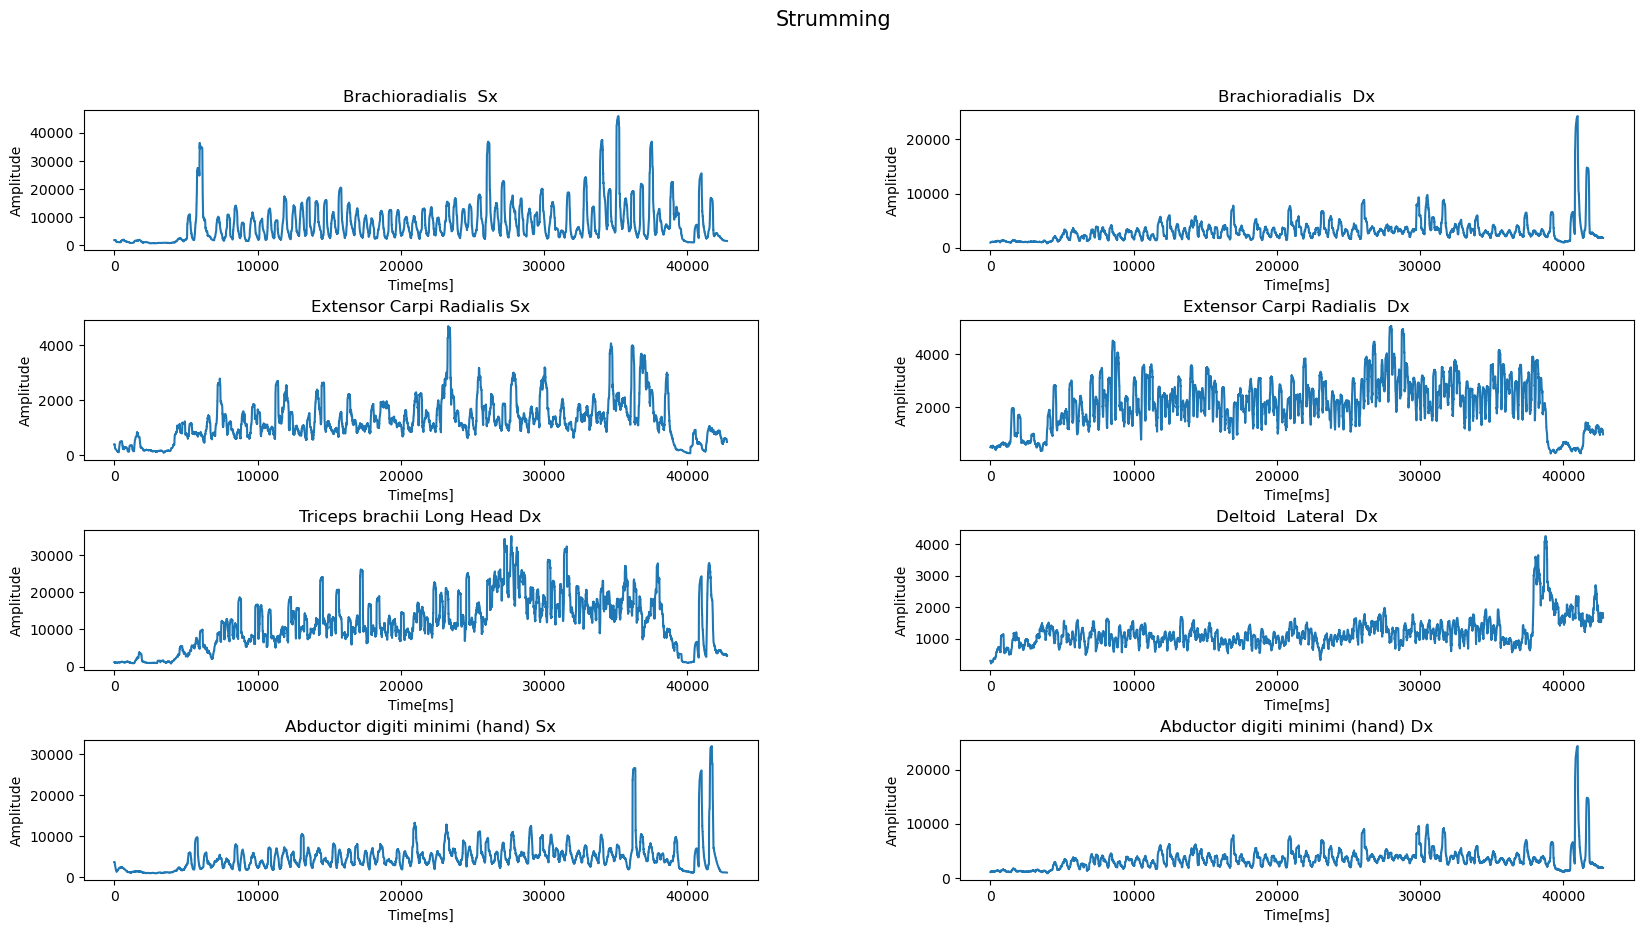

In [ ]:
arpeggio_lenght = npdf_arpeggio_rms.shape[0] - 1
arpeggio_duration= Ts *arpeggio_lenght #in seconds
arpeggio_istants= np.arange(0, arpeggio_lenght)* Ts #sampling instants

#devo trovare un modo per plottare tutti e 8 i canali in un unico plot 
#print("Arpeggio instants: ", len(arpeggio_istants), "Arpeggio lenght: ",  len(npdf_arpeggio.T[1, 1:]) )
fig = plt.figure(figsize=(20,10))
fig.suptitle("Strumming", fontsize=15)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i in range(1, 9):
    ax = fig.add_subplot(4, 2, i)
    ax.plot(npdf_strumming_rms.T[i, 1:])
    plt.ylabel('Amplitude')
    plt.xlabel('Time[ms]')
    plt.title(muscles[i-1])
#print(arpeggio_lenght, strumming_lenght)
#print(npdf_arpeggio)

## Spikes removal 

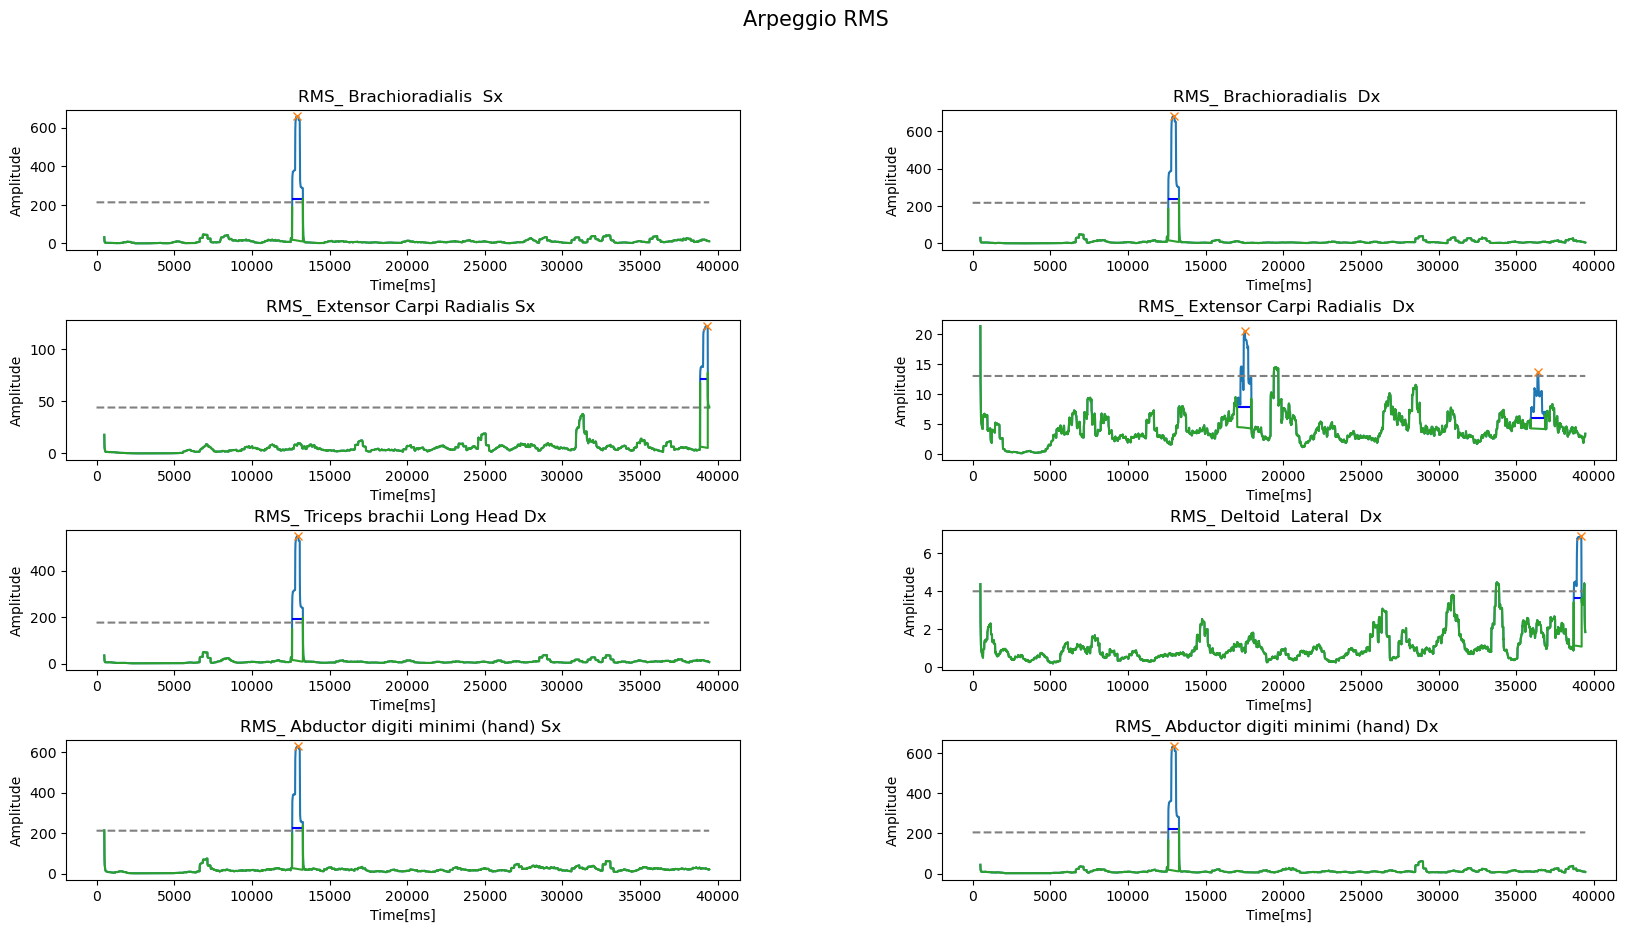

(0, array([12937]))
(1, array([12996]))
(2, array([39302]))
(3, array([17527, 36395]))
(4, array([12997]))
(5, array([39172]))
(6, array([12996]))
(7, array([12994]))


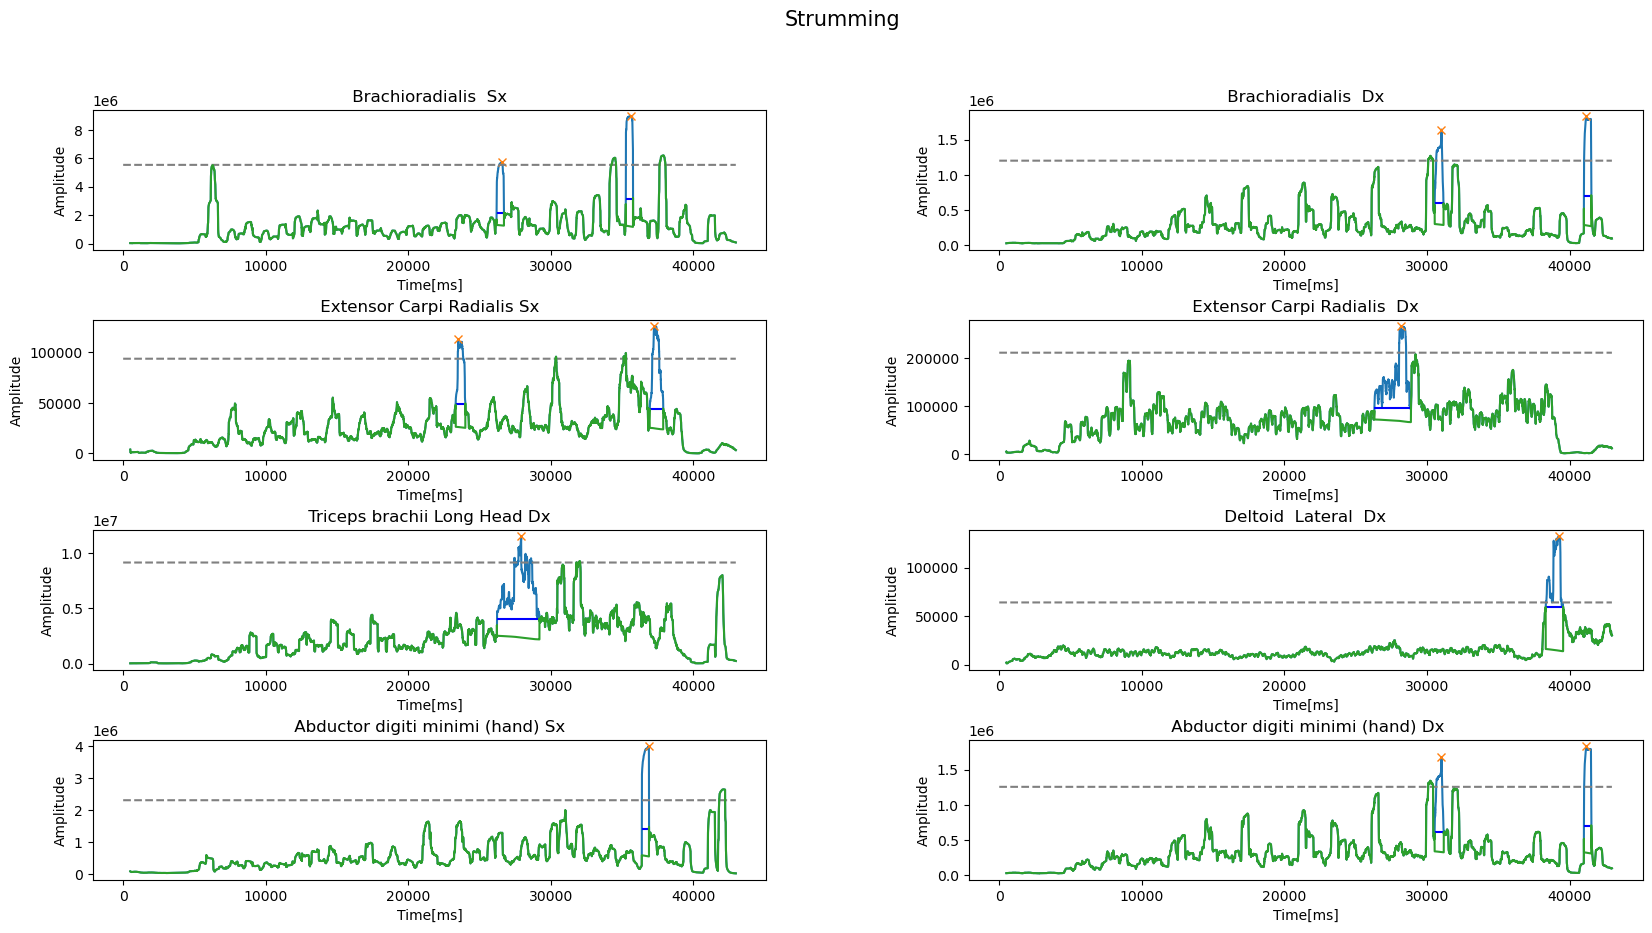

(0, array([26587, 35588]))
(1, array([31018, 41181]))
(2, array([23508, 37259]))
(3, array([28179]))
(4, array([27916]))
(5, array([39281]))
(6, array([36871]))
(7, array([31018, 41181]))


'\nbending=Tkeo_filtering(title= "Bending", inputDataframe= dataFrame_bending_raw)\nbendingFilteredDataFrame= bending.tkeo_computation()\n\npullOffHammerOn=Tkeo_filtering(title= "PullOffHammerOn", inputDataframe= dataFrame_pullOffHammerOn_raw)\npullOffHammerOnFilteredDataFrame= pullOffHammerOn.tkeo_computation()\n\ntapping=Tkeo_filtering(title= "tapping", inputDataframe= dataFrame_tapping_raw)\ntappingFilteredDataFrame= tapping.tkeo_computation()\n\nstrongPick=Tkeo_filtering(title= "strongPick", inputDataframe= dataFrame_strongPick_raw)\nstrongPickFilteredDataFrame= strongPick.tkeo_computation()\n\ndoublePick=Tkeo_filtering(title= "doublePick", inputDataframe= dataFrame_doublePick_raw)\ndoublePickFilteredDataFrame= doublePick.tkeo_computation()\n'

In [ ]:

#rel_height = 0.7
# FILTRI
def butter_bandpass(lowcut, highcut, fs, order):
    """returns butterworth filter coefficients
    
    Args:
        lowcut(int,float): low cutoff frequency
        highcut(int,float): high cutoff frequency
        fs(int): sampling frequency
        order(int,optional): order of the filter, default value {5}
 
    Returns: 
        ndarray: Numerator polynomials of the IIR filter
    Returns:
        ndarray: Denominator polynomials of the IIR filter
    """
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    """returns the filtered signal after butterworth filter is applied
    
    Args:
        data (array_like): original signal
        lowcut(int,float): low cutoff frequency
        highcut(int,float): high cutoff frequency
        fs(int): sampling frequency
        order(int,optional): order of the filter, default value {3}

    Returns:
        array_like: output of the digital filter
    """
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    y = lfilter(b, a, data)
    return y
def butter_lowpass(cutoff, fs, order=2):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)
def butter_lowpass_filter(data, cutoff, fs, order=2):
    b, a = butter_lowpass(cutoff, fs, order=2)
    y = lfilter(b, a, data)
    return y
def treshold_detection(data):
    """
    We can compute the th in two ways: 

    """
    #data = data[treshold_start:treshold_end]
    # data = data[35:85]
    #my implementation of the thresold
    """
    data.index = range(0, data.shape[0]) # to trasform the nan into 0.0 
    data_np= data.index.to_numpy()
    #data_np= np.asarray(data)
    rms_data = np.sqrt(np.sum(np.square(data_np))/np.size(data_np)) #rms computation 
    mean_rms= np.mean(rms_data)
    std_rms= np.std(data_np)
    thresholdWeight= 0.1
    mean_rms_threshold= thresholdWeight * mean_rms
    treshold_rms= mean_rms + mean_rms_threshold*std_rms
    #Try this threshold  
    """
  
    
    data.index = range(0, data.shape[0]) ## to trasform the Nan into the most feasible element, in this case float
    mean = data.mean()
    std = data.std()
    cost = 3
    treshold = mean + cost*std
    return treshold

def TKEO_processing(data, muscle_to_plot, relative_height, ax):
    """
    returns the filtered signal after TKEO filtering
    
    Args:
        data (array_like): original signal
        muscle_to_plot (list of string): list of muscles for the plotting 
        relative_height(float [0,1]): Chooses the relative height at which the peak width is measured as a percentage of its prominence. 
        1.0 calculates the width of the peak at its lowest contour line while 0.5 evaluates at half the prominence height. Must be at least 0
    Returns:
        peaks_found: list of couple muscle-num_peaks_found 
        left_ips1: 
        right_ips1: 
       
    """
    
    # BUTTER BANDPASS
    data_bandpass = butter_bandpass_filter(data, 20, 499, 1000, 3)
    
    #RMS 
    #data_rms= np.sqrt(np.mean(np.abs(data_bandpass)**2, axis=-1, keepdims=True))#np.sqrt(np.sum(np.square(data_bandpass))/np.size(data_bandpass))

    data_DataFrame = pd.DataFrame(data_bandpass, columns=[muscle_to_plot])
    
    # TKEO
    data_TKEO = []
    for i in range (1, len(data_DataFrame)-1):
        tkeo_i = pow(data_DataFrame[muscle_to_plot][i], 2) - data_DataFrame[muscle_to_plot][i-1]*data_DataFrame[muscle_to_plot][i+1]
        data_TKEO.append(tkeo_i)

    data_TKEO = pd.DataFrame(data_TKEO, columns=[muscle_to_plot])

    #REMOVING THE BASELINE 
    #baseline= peakutils.baseline(data_TKEO, deg= 2) # deg= Degree of the polynomial that will estimate the envelope.
    #data_TKEO = data_TKEO - baseline #subtracting the baseline
    #plt.plot(data_TKEO)
    #plt.plot(baseline)

    # RECTIFICATION
    data_TKEO = abs(data_TKEO)

    
    # LOW PASS FILTER 50 Hz 2nd Order
    data_TKEO_filtered = butter_lowpass_filter(data_TKEO, 50, 1000)
    data_TKEO_filtered = pd.DataFrame(data_TKEO_filtered, columns=[muscle_to_plot])

    # MOVING AVERAGE
    data_TKEO_filtered = pd.DataFrame.rolling(data_TKEO_filtered, 500).mean()

    # TRESHOLD
    height_threshold = np.round(treshold_detection(data_TKEO_filtered))
    #print('the threshold for ', muscle_to_plot, ' is equal to: ', height_threshold)

    peaks_found = peakutils.peak.indexes(data_TKEO_filtered[muscle_to_plot], thres_abs=True, thres=int(height_threshold), min_dist=9000)
    average_pf1 = np.mean(data_TKEO_filtered[muscle_to_plot][peaks_found])

    #print('PEAKS FOUND: ', muscle_to_plot, '\t', len(peaks_found))
    #print(df_ErectorSpinaeSx[muscle_to_plot][peaks_found])


    plt.plot(data_TKEO_filtered) #plot the signal
    plt.plot(peaks_found, data_TKEO_filtered[muscle_to_plot][peaks_found], 'x') # highlist the peaks found crossed by x 
    plt.plot(np.full_like(data_TKEO_filtered, height_threshold), "--", color="gray") # plot a line in the y axis to show the threshold level
    plt.title(muscle_to_plot)

    #the peak prominance is the relative peack height, the vertical line that start from.
    #the vertical distance between the peak and its lowest contour line in comparison to the surrounding baseline of the signal. 
    prominences, left_bases, right_bases = peak_prominences(data_TKEO_filtered[muscle_to_plot], peaks_found)
    
    #peak_widths calculates the width of a peak in samples at a relative distance to the peak’s height and prominence.
    widths, h_eval, left_ips1, right_ips1 = peak_widths(data_TKEO_filtered[muscle_to_plot], peaks_found, 
                                                        rel_height=relative_height,
                                                        prominence_data=(prominences, left_bases, right_bases)
    )
   
    # left_ips1, right_ips1: Interpolated positions of left and right intersection points of a horizontal line at the respective evaluation height= rel_height.
    for i in range (0, len(h_eval)):
        plt.hlines(y=h_eval[i], xmin=left_ips1[i], xmax=right_ips1[i], color="blue")
    
    #data_TKEO_filtered.loc[int(left_ips1):int(right_ips1)].at[muscle_to_plot] = np.mean(data_TKEO_filtered[muscle_to_plot])
    for j in range(len(peaks_found)): #if we found some peaks 
        for i in range(int(left_ips1[j]), int(right_ips1[j])):
            data_TKEO_filtered.loc[i].at[muscle_to_plot] = np.mean(data_TKEO_filtered[muscle_to_plot])
    
    data_TKEO_filtered_array= np.asarray(data_TKEO_filtered[muscle_to_plot])
    #print(data_TKEO_filtered_array)
    ax.plot(data_TKEO_filtered)
    #plt.show()
    
    return peaks_found, left_ips1, right_ips1, data_TKEO_filtered_array

################################################################## CLASSE ####################################################################
##################################################################        ####################################################################
##################################################################        ####################################################################
##################################################################        ####################################################################
##################################################################        ####################################################################
class Tkeo_filtering:
    """
    This class take in input your RawPower Exel export file, it remove the spikes creating a filtered dataframe, saving it in the path that you specify.
    Args:
        inputPath (string): export excel path of the rawPower Recording 
        finalPath(string): the path where you want to save the filtered dataframe 
        rel_height(float [0,1]): Chooses the relative height at which the peak width is measured as a percentage of its prominence. 
                                 1.0 calculates the width of the peak at its lowest contour line while 0.5 evaluates at half the prominence height. 
                                 Must be at least 0.
        nColumns_plot(int): number of columns of the final plot
        nRows_plot(int): number of raws of the final plot

    Returns:
        matplotlib plot: the plot with the spikes that will be removed 
        pandas dataframes: the peaks filtered dataframess
    """
    #costructore
    def __init__(self, title, inputDataframe,inputPath= "",finalPath= "", rel_height= 0.65, nColumns_plot = 2, nRows_plot= 4):
        self.title= title
        self.inputPath= inputPath
        self.finalPath= finalPath
        #self.df = pd.read_csv(self.inputPath, delimiter=";") #create the dataframe for the istance 
        self.df= inputDataframe #pd.read_excel(io=self.inputPath, sheet_name= "Sheet1", engine= "openpyxl")
        self.rel_height= rel_height
        self.muscles = self.df.columns.values[1:] # get the list of muscles for the specific acquisition, discarding the first 3 columns equal to 'TIMESTAMP', 'STREAM_ID', 'SEQUENCE'
        self.nColumns_plot = nColumns_plot
        self.nRows_plot = nRows_plot
        self.np_df= np.asarray(self.df)
        self.filteredInput= [] 
        self.peaks_found = [] 
        self.left_ips = []   
        self.right_ips = []  
        self.time_start = [] 
        self.time_end = []    
        self.min_len = []
        self.peak_to_be_deleted = []
        self.peak_to_be_deleted2 = []
        self.mini= 0
        self.final_df = pd.DataFrame()

    #method to apply a time conversion in the takeo_computation
    def time_conversion(self,array):
        """
        Takes an array and convert each values in a time unit in ms
        Return : array of time converted elements
        """
        time_converted = []
        for ms in array:
            duration = ms
            minutes, seconds = divmod(duration / 1000, 60)
            time = f'{minutes:0>2.0f}:{seconds:.3f}'
            time_converted.append(time)
        return time_converted

    def tkeo_computation(self):
        
        fig = plt.figure(figsize=(20,10))
        fig.suptitle(self.title, fontsize=15)
        fig.subplots_adjust(hspace=0.5, wspace=0.3)

        for k in range(len(self.muscles)):
            
            ax = fig.add_subplot(self.nRows_plot,self.nColumns_plot, k+1)
            
            peaks_found,left_ips,right_ips,takeoFilteredOutput = TKEO_processing(self.np_df[1:,1+k], self.muscles[k], self.rel_height, ax)
            #plt.plot(zcr)
            plt.ylabel('Amplitude')
            plt.xlabel('Time[ms]')
            plt.title(self.muscles[k])
            
            self.peaks_found.append(peaks_found)
            self.left_ips.append(left_ips)
            self.right_ips.append(right_ips)
            self.filteredInput.append(takeoFilteredOutput) # for the final dataframe
        plt.show()
        #enumerate= elencare
        for i in enumerate(self.peaks_found):
            print(i)
        #devi fare i plot dopo, prima calcoli i 7 muscoli e poi fai la plot 
        """        
        for i in range(len(self.muscles)):
            #per ogni muscolo aggiungo alla lista min_len il numero di peacks trovati
            self.min_len.append(len(self.peaks_found[i]))
        
        for i in range(len(self.muscles)):
            if self.min_len[i] < 51: #se al muscolo i ho trovato meno di 51 picchi allora aggiungo il numero alla lista picchi da eliminare
                self.peak_to_be_deleted.append(i)
                self.peak_to_be_deleted2.append(i)

        #TOGLIE I PEAK AGGIUNTI A TO_BE_DELATED DA MIN_LEN 
        for i in range(len(self.peak_to_be_deleted)):
            if self.min_len: # check if the list is not empty 
                popped = self.min_len.pop(self.peak_to_be_deleted[i])
                #print('POPPED: ', popped)
                #print('indec ', self.peak_to_be_deleted[i])
                for j in range(i, len(self.peak_to_be_deleted)): # if one peack is popped out of the list I fill the gap moving everything downward 
                    self.peak_to_be_deleted[j] = self.peak_to_be_deleted[j]-1 # shift all the element to fill the gap
        
        if self.min_len: # check if the list is not empty
            self.mini = min(self.min_len)
            if(self.mini > 52): 
                self.mini = 52

        for i in range(len(self.muscles)):
            if not i in self.peak_to_be_deleted2:
                self.peaks_found[i] = self.peaks_found[i][0:self.mini]
                self.left_ips[i] = self.left_ips[i][0:self.mini]
                self.right_ips[i] = self.right_ips[i][0:self.mini]
                
        for i in range(len(self.left_ips)):
          self.left_ips[i] = np.round(np.asarray(self.left_ips[i]))
          #self.left_ips.append(np.round(self.left_ips[i]))
        
        for i in range(len(self.right_ips)):
           self.right_ips[i] = np.round(np.asarray(self.right_ips[i]))
           #self.right_ips.append(np.round(self.right_ips[i]))

        for i in range(len(self.left_ips)):
           self.time_start.append(self.time_conversion(self.left_ips[i]))

        for i in range(len(self.right_ips)):
           #self.time_end[i] = self.time_conversion(self.right_ips[i])
           self.time_end.append(self.time_conversion(self.right_ips[i]))
        
        for i in range(len(self.muscles)):
            if not i in self.peak_to_be_deleted2:
                print('sono dentro il if not i in peak_to_be_deleted2')
                self.final_df[self.muscles[i]] = self.left_ips[i]
                self.final_df[self.muscles[i]] = self.right_ips[i]
        """    
        self.final_df[self.muscles]= np.asarray(self.filteredInput).T
        #self.final_df['TIME'] = np.asarray(self.df['TIME']).T
        #self.final_df[self.muscles]= np.asarray(self.filteredInput).T
        
        """
        DA SISTEMARE:  IL WRITE EXCEL DEL FINAL DATAFRAME 
        non usa la parte del time_conversation per ora
        """
        #self.final_df.to_excel(self.finalPath, engine= "openpyxl")
        #self.final_df.to_csv(self.finalPath)
        return self.final_df
##allora sei arrivato a n_rows e NColumns devi capire come iterare tra le righe e le colonne 
    
###Class testing 
#arpeggio = Tkeo_filtering(title= "Arpeggio raw", inputDataframe= dataFrame_arpeggio_raw)   
#arpeggioFinalDataframe= arpeggio.tkeo_computation()

arpeggio = Tkeo_filtering(title= "Arpeggio RMS", inputDataframe= dataFrame_arpeggio_rms)   
arpeggioFinalDataframee= arpeggio.tkeo_computation()


strumming=Tkeo_filtering(title= "Strumming", inputDataframe= dataFrame_strumming_raw)
strummingFilteredDataFrame= strumming.tkeo_computation()
"""
bending=Tkeo_filtering(title= "Bending", inputDataframe= dataFrame_bending_raw)
bendingFilteredDataFrame= bending.tkeo_computation()

pullOffHammerOn=Tkeo_filtering(title= "PullOffHammerOn", inputDataframe= dataFrame_pullOffHammerOn_raw)
pullOffHammerOnFilteredDataFrame= pullOffHammerOn.tkeo_computation()

tapping=Tkeo_filtering(title= "tapping", inputDataframe= dataFrame_tapping_raw)
tappingFilteredDataFrame= tapping.tkeo_computation()

strongPick=Tkeo_filtering(title= "strongPick", inputDataframe= dataFrame_strongPick_raw)
strongPickFilteredDataFrame= strongPick.tkeo_computation()

doublePick=Tkeo_filtering(title= "doublePick", inputDataframe= dataFrame_doublePick_raw)
doublePickFilteredDataFrame= doublePick.tkeo_computation()
"""
